<a href="https://colab.research.google.com/github/KamalRiad90/Chicago-Crime-Data/blob/main/Chicago-crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import pandas as pd

In [2]:
zip_path = "/content/drive/MyDrive/AXSOSACADEMY/06-AdvancedML/Week23/Chicago_Crime_2001-2022.zip"
extract_path = "/content/extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

csv_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


In [4]:
df.head()

ID                    Date         Primary Type    Description  \
0  11192844  01/01/2018 01:00:00 AM                THEFT  FROM BUILDING   
1  11192897  01/01/2018 01:00:00 AM                THEFT  FROM BUILDING   
2  11193062  01/01/2018 01:00:00 PM      CRIMINAL DAMAGE     TO VEHICLE   
3  11193451  01/01/2018 01:00:00 AM  MOTOR VEHICLE THEFT     AUTOMOBILE   
4  11193104  01/01/2018 01:00:00 AM  MOTOR VEHICLE THEFT     AUTOMOBILE   

  Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0           RESTAURANT   False     False  1831      18.0  42.0  41.889752   
1          HOTEL/MOTEL   False     False  1834      18.0  42.0  41.888267   
2               STREET   False     False  2521      25.0  31.0  41.937874   
3               STREET   False     False  1915      19.0  46.0  41.958011   
4               STREET   False     False   833       8.0  13.0  41.772381   

   Longitude  
0 -87.631073  
1 -87.627075  
2 -87.750018  
3 -87.652747  
4 -87.716360

In [5]:
df['datetime']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [6]:
df=df.set_index('datetime').sort_index()

In [7]:
df.index.year.unique()

Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int32', name='datetime')

In [8]:
daily_crime = df.resample('D').size().reset_index(name='Crime Count')

In [9]:
daily_crime=daily_crime.set_index('datetime').sort_index()

In [10]:
daily_crime

Crime Count
datetime               
2001-01-01         1825
2001-01-02         1143
2001-01-03         1151
2001-01-04         1166
2001-01-05         1267
...                 ...
2022-12-27          583
2022-12-28          618
2022-12-29          648
2022-12-30          674
2022-12-31          726

[8035 rows x 1 columns]

In [11]:
District22 = df.loc[df.index.year == 2022].groupby('District').size().sort_values(ascending=False)
District22

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
dtype: int64

As we Can See District number 31 has the least crimes count , while District number 8 has the highest crimes count

<Axes: xlabel='District'>

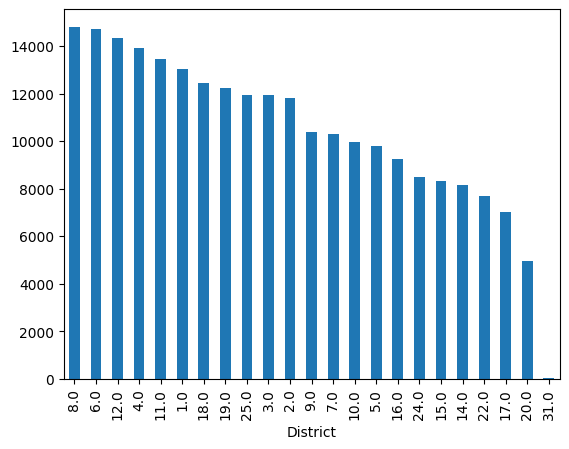

In [12]:
District22.plot(kind='bar')

In [13]:
Yearly_count = df.resample('YE').size().reset_index(name='Crime Count')
Yearly_count=Yearly_count.set_index('datetime')
Yearly_count.index.year.unique()

Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int32', name='datetime')

In [15]:
import matplotlib.pyplot as plt

<Axes: xlabel='year'>

<Figure size 1000x600 with 0 Axes>

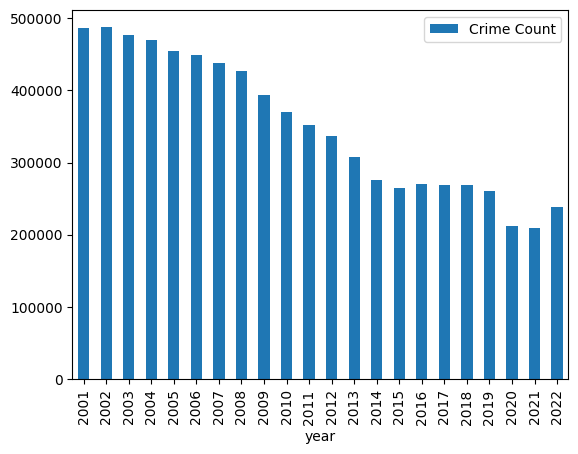

In [16]:
Yearly_count['year'] = Yearly_count.index.year
plt.figure(figsize=(10, 6))
Yearly_count.plot(kind='bar', x='year', y='Crime Count')

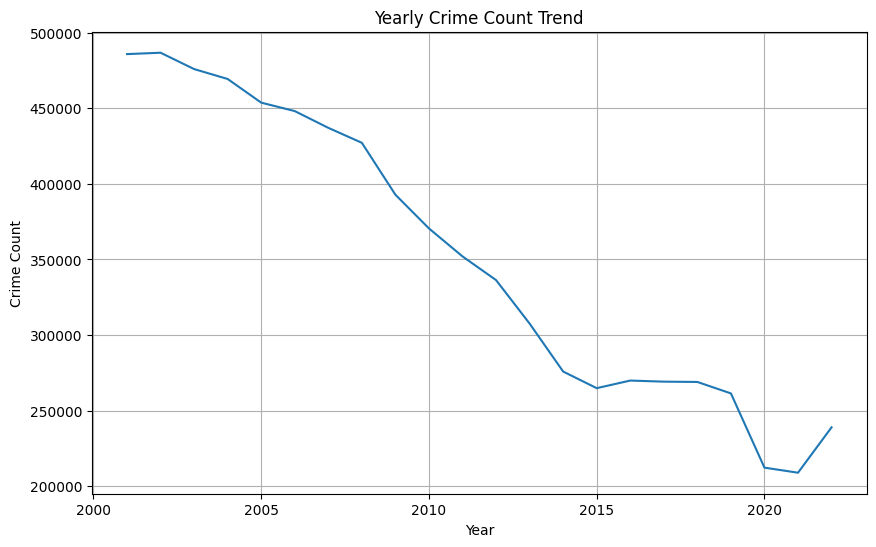

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(Yearly_count.index.year, Yearly_count['Crime Count'])
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Yearly Crime Count Trend')
plt.grid(True)
plt.show()

we can observe a general trend of decreasing crime over the years from 2001 to 2022. There are some fluctuations, but the overall pattern shows a significant decline in the number of crimes

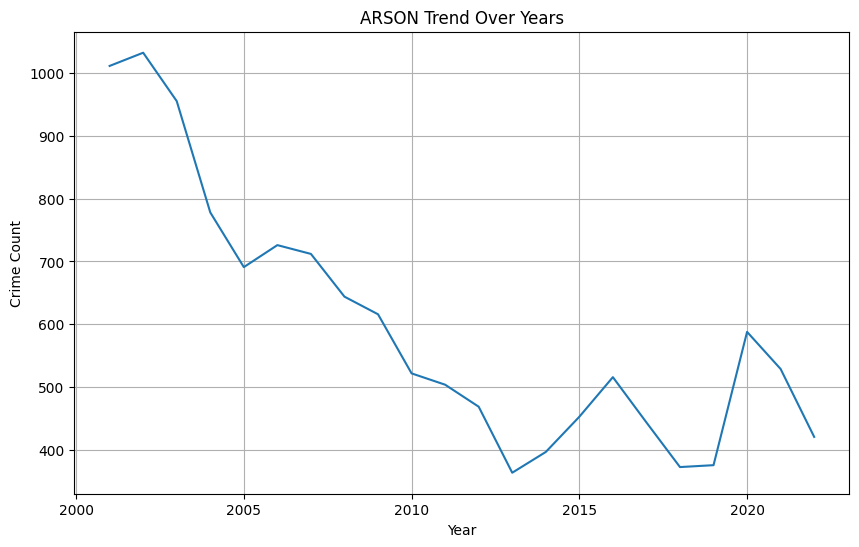

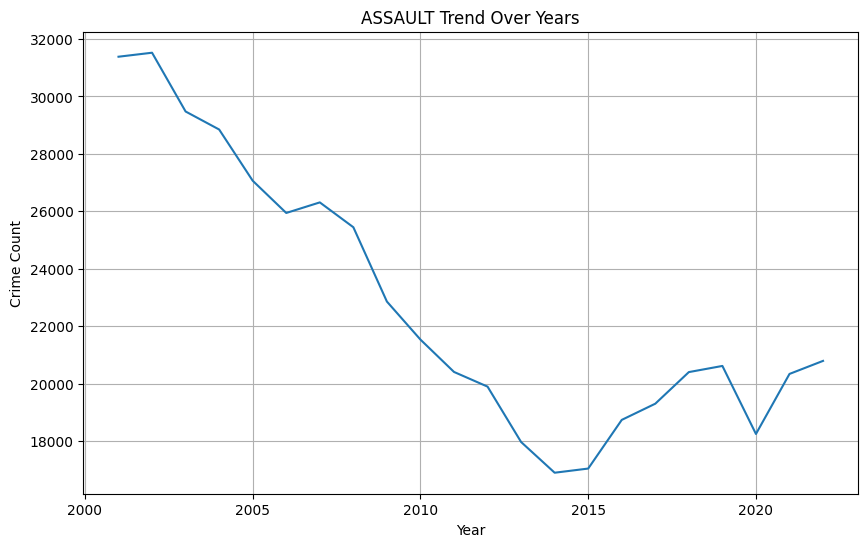

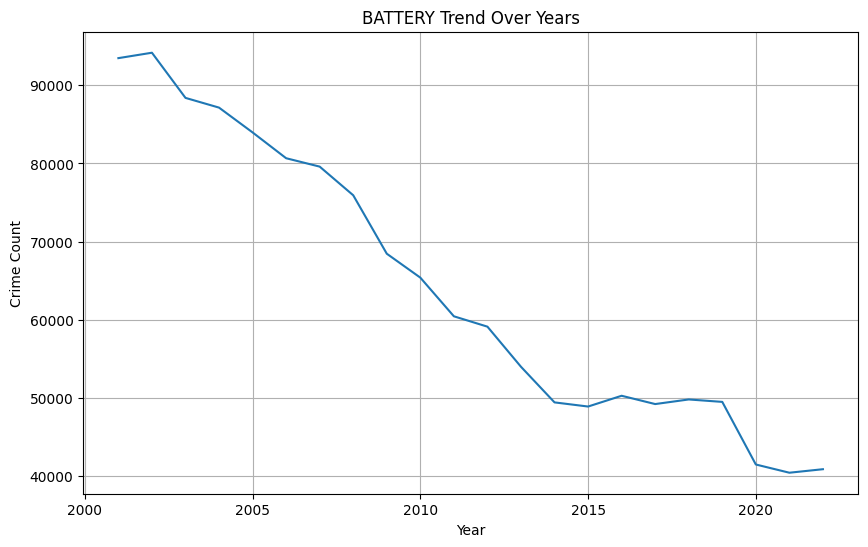

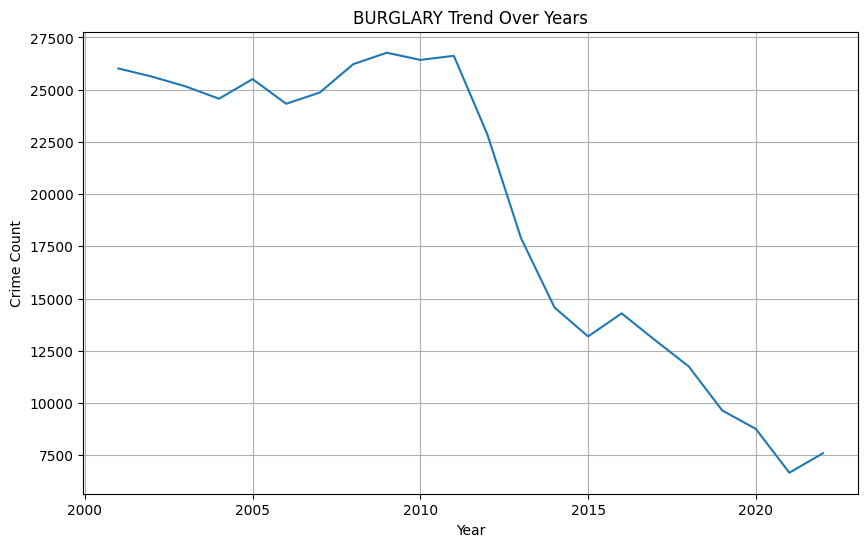

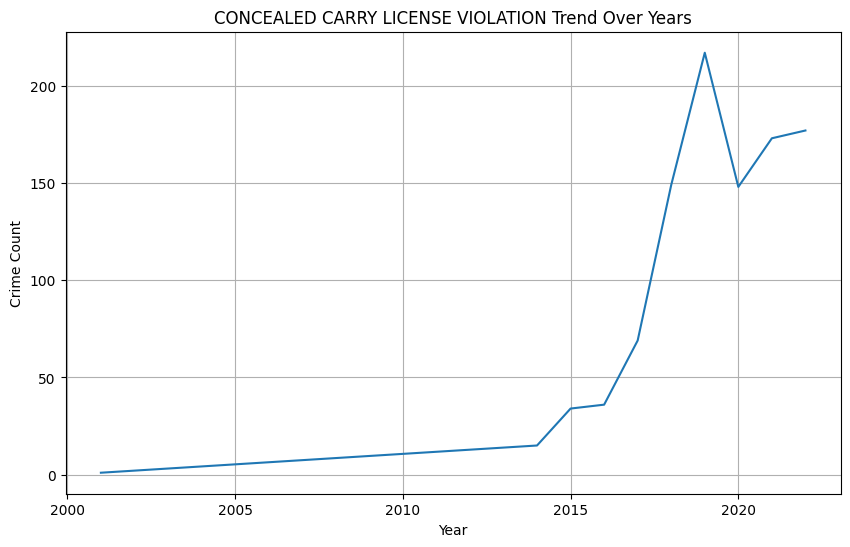

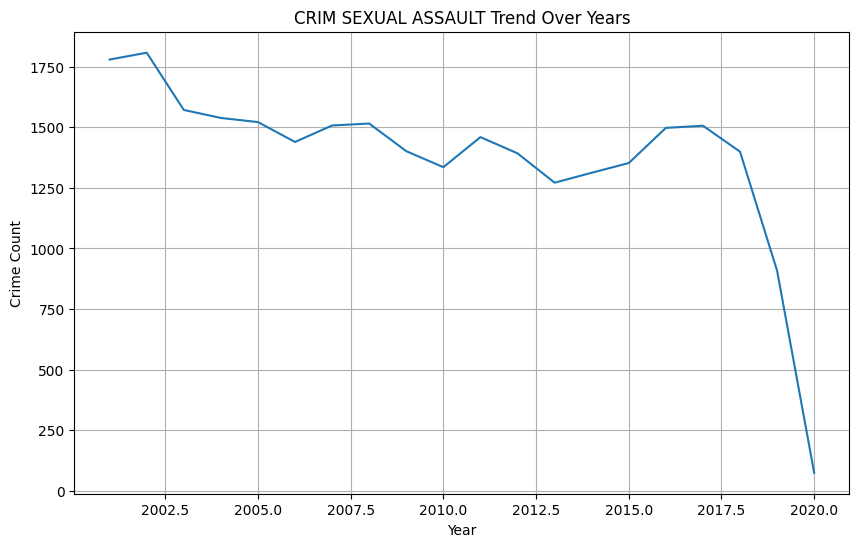

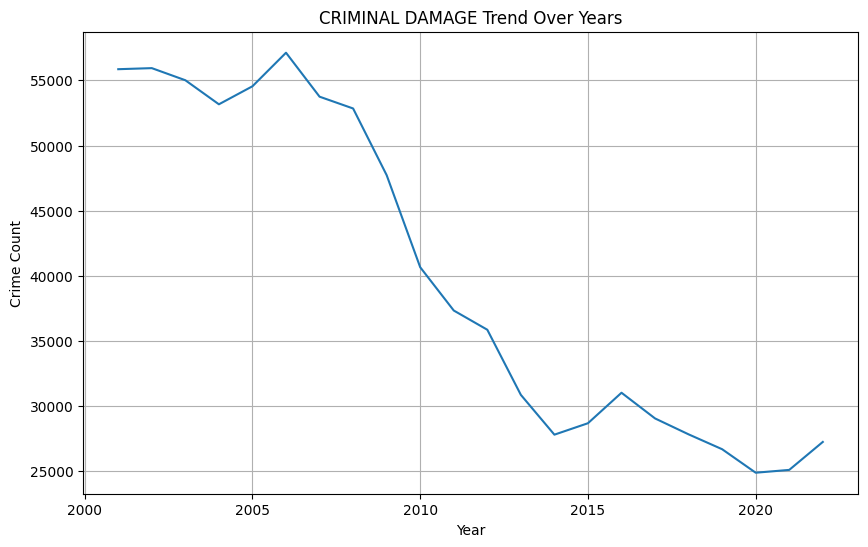

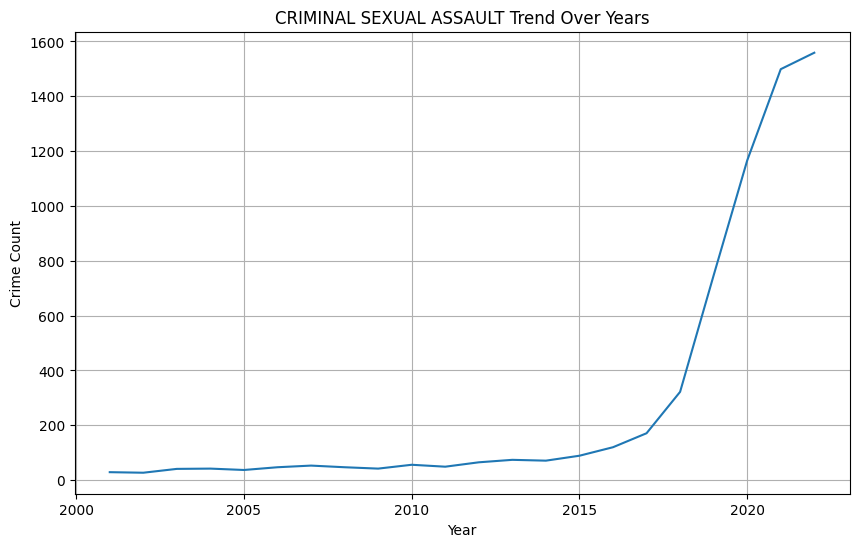

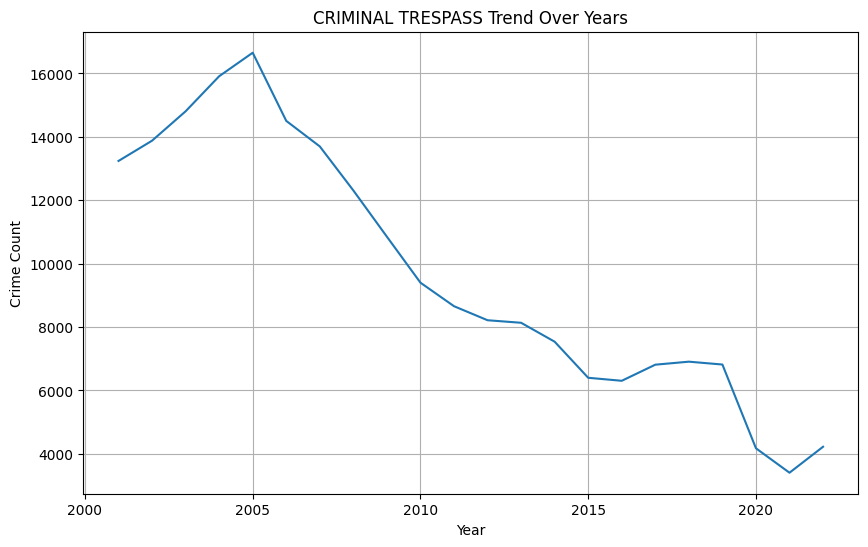

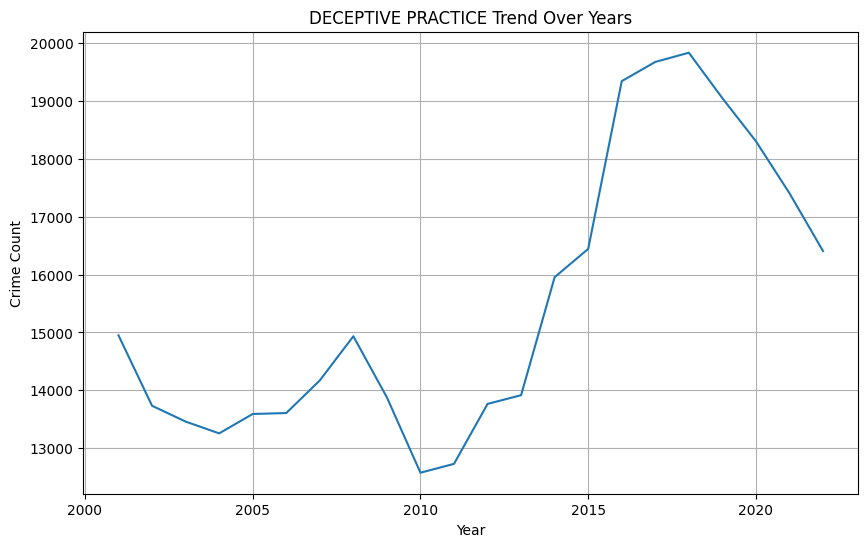

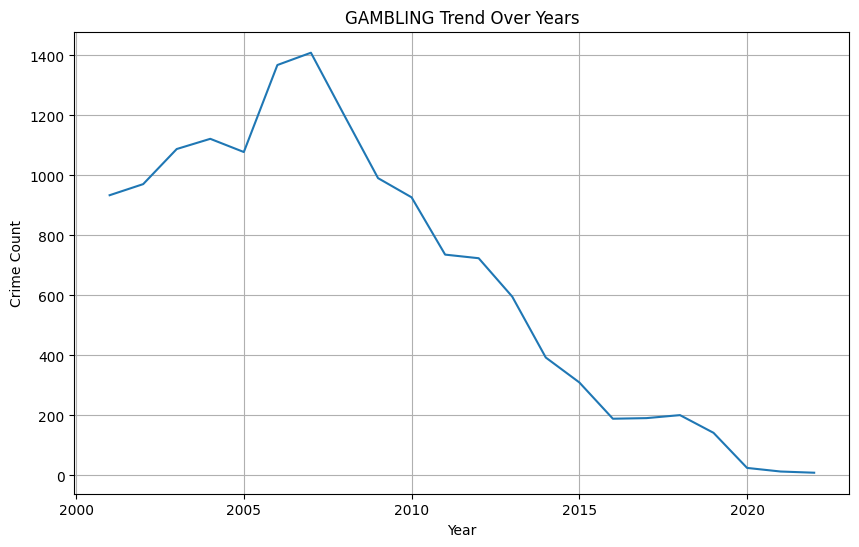

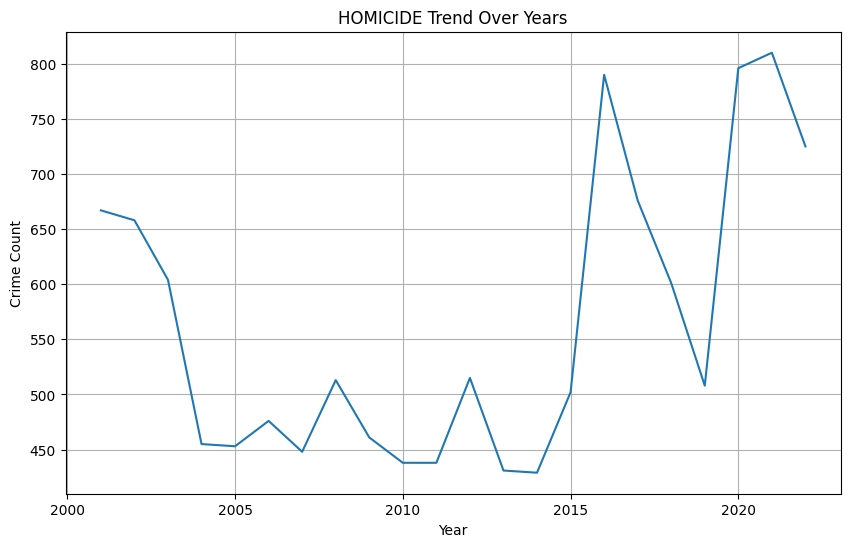

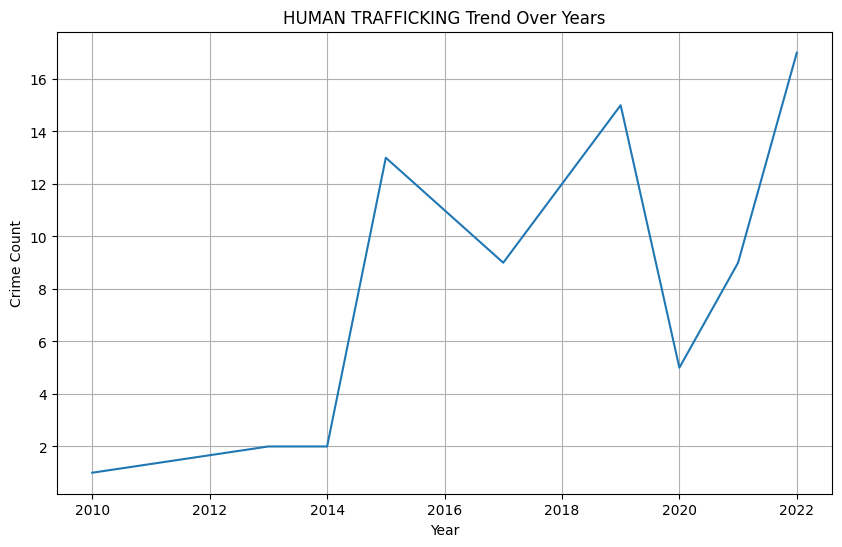

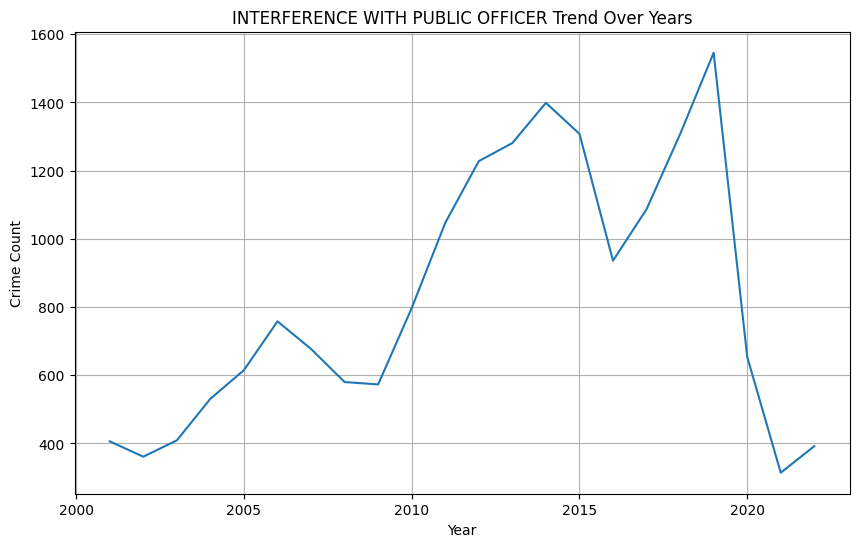

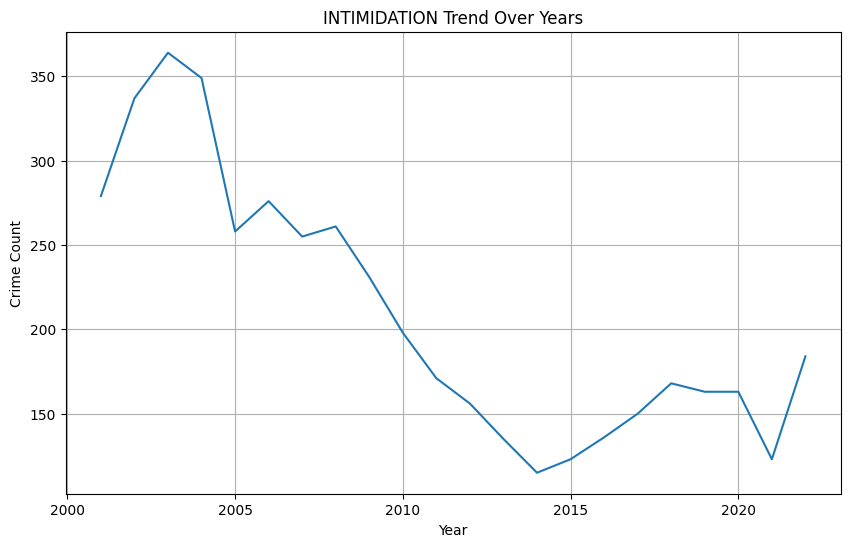

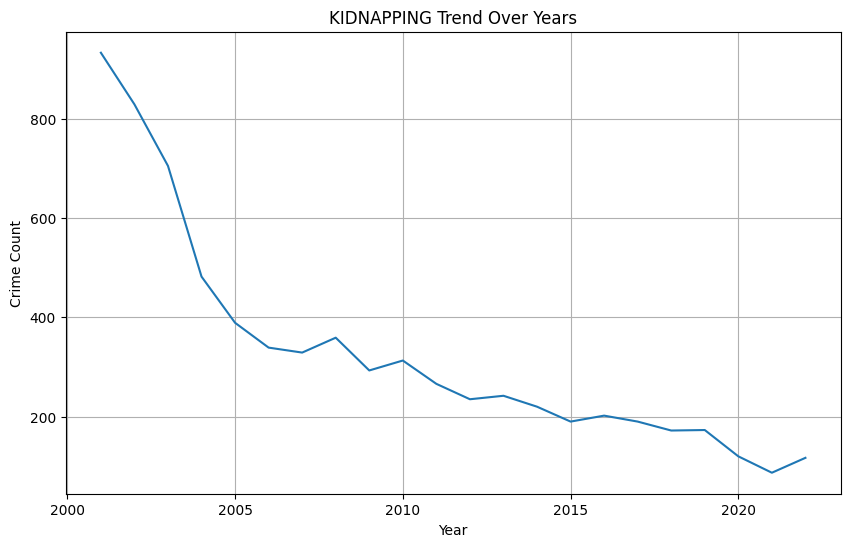

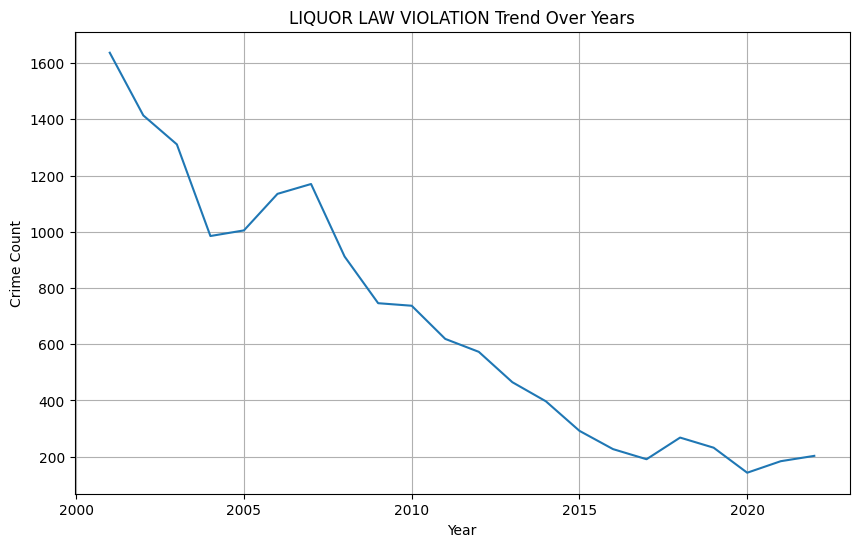

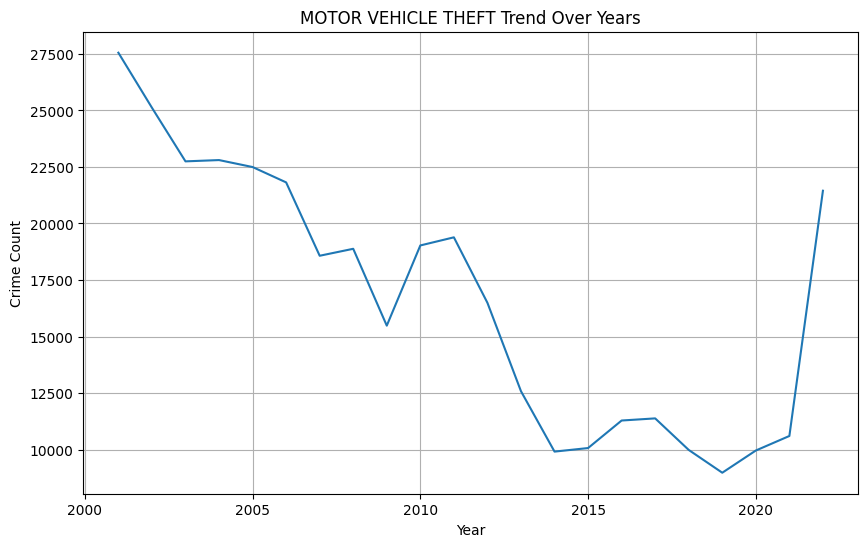

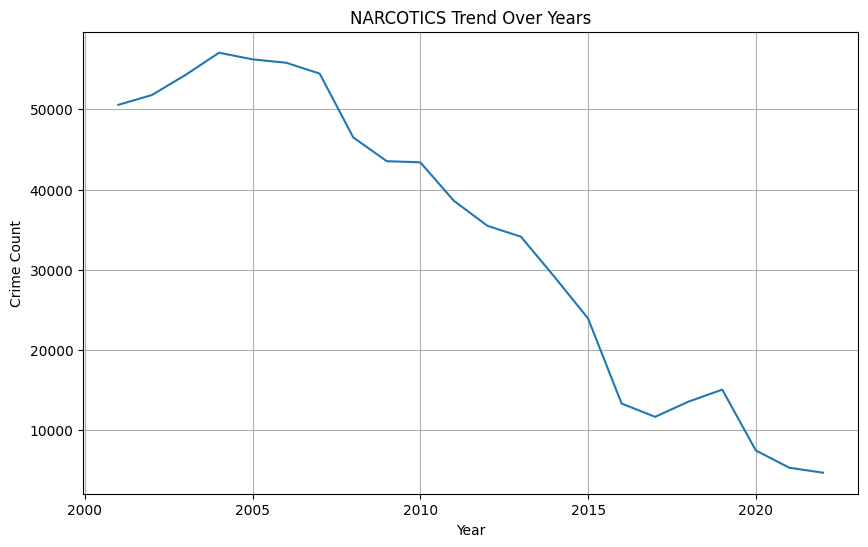

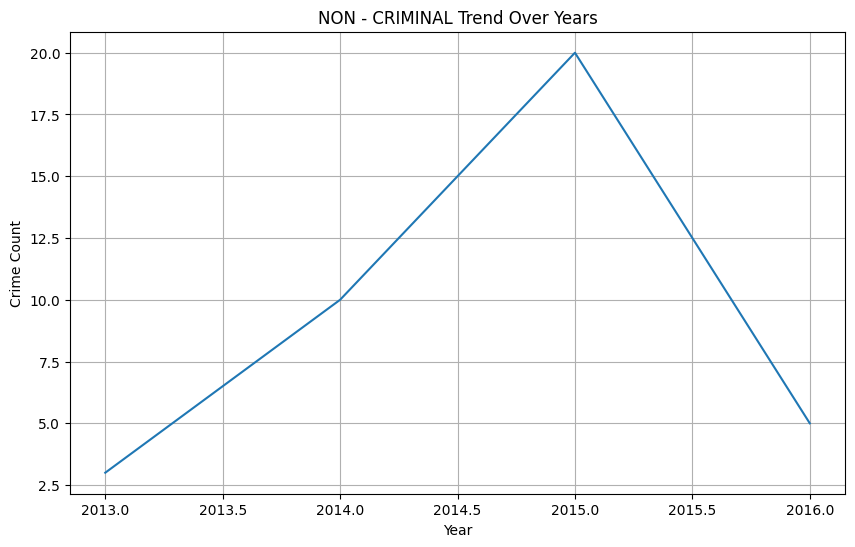

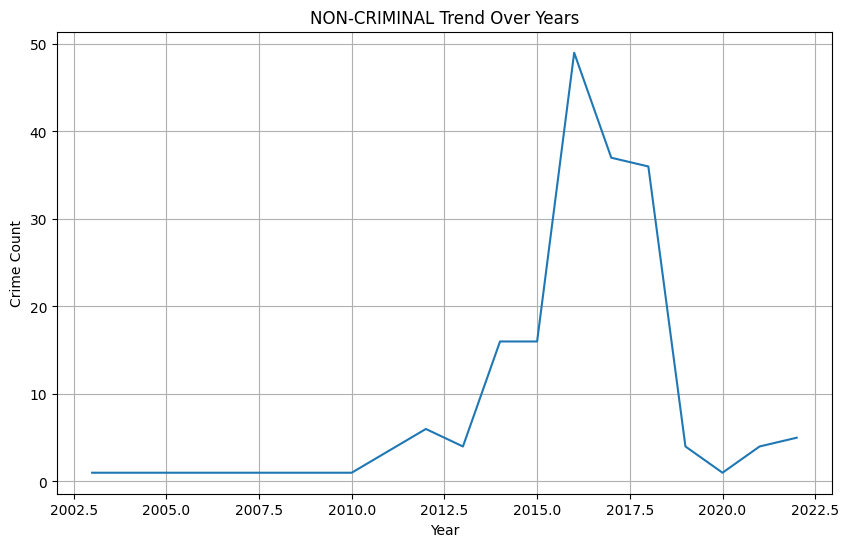

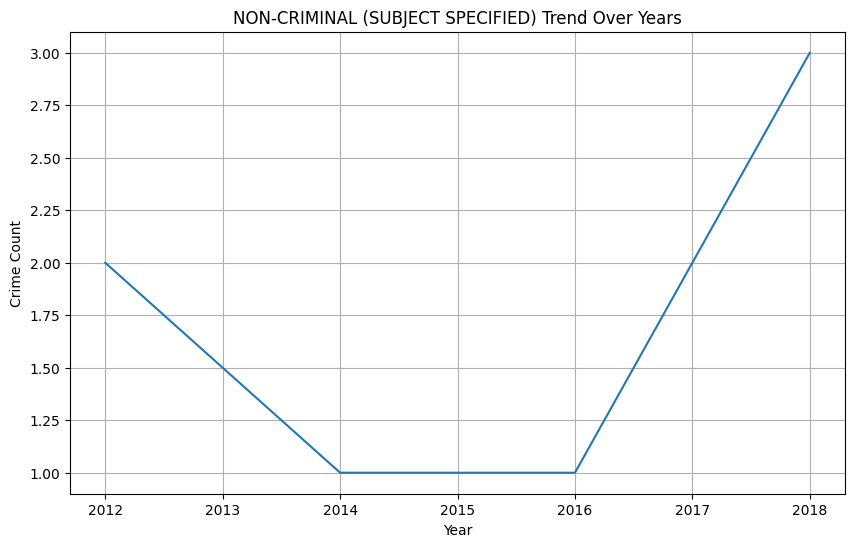

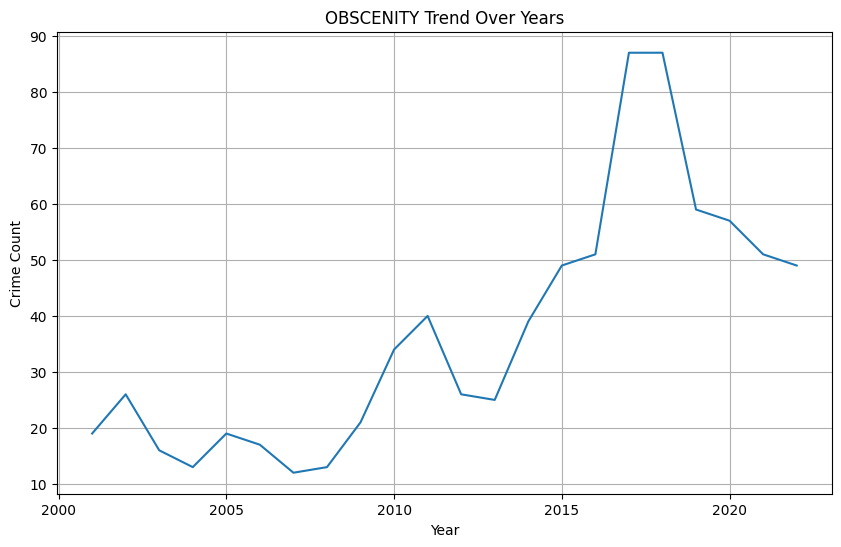

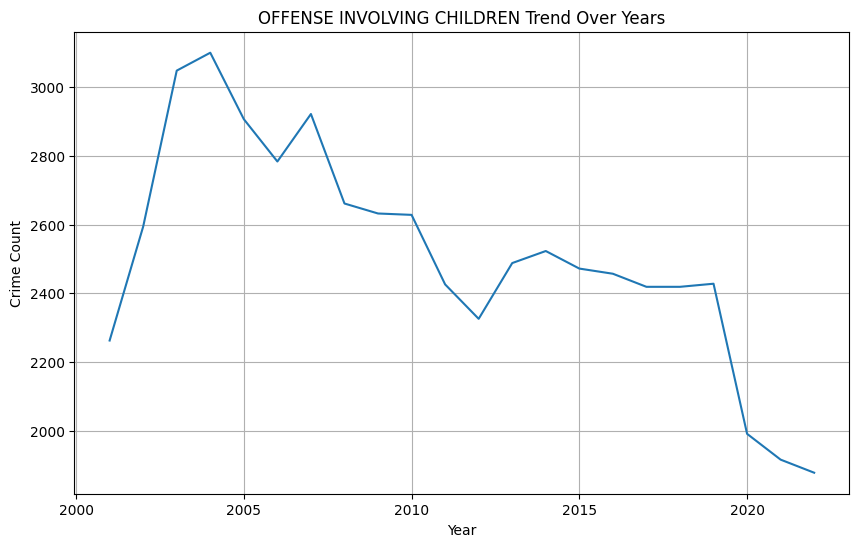

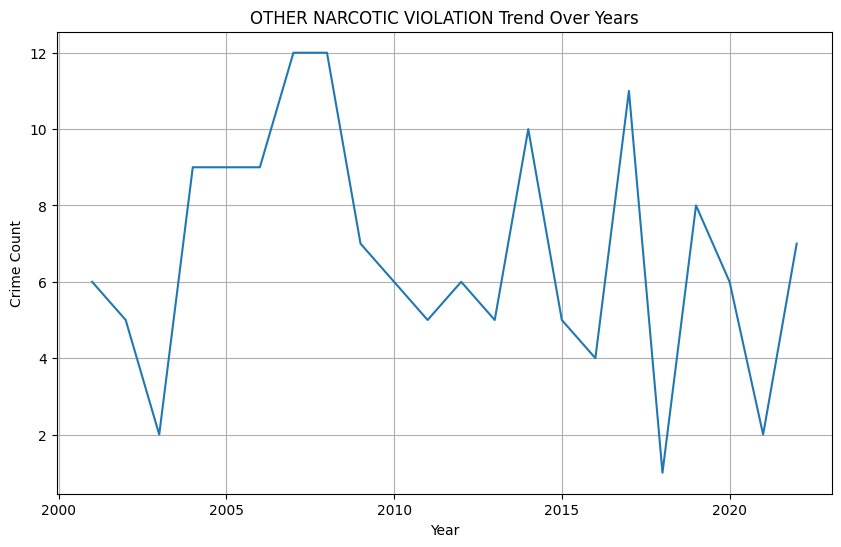

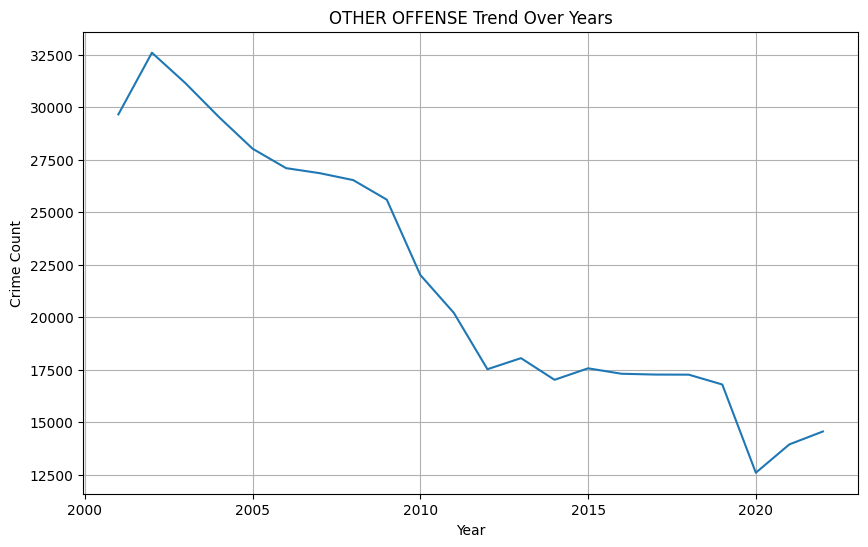

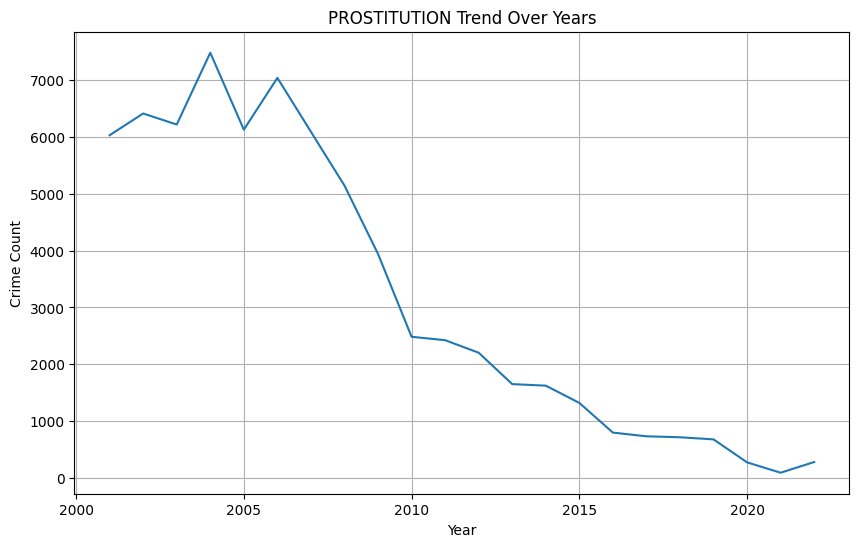

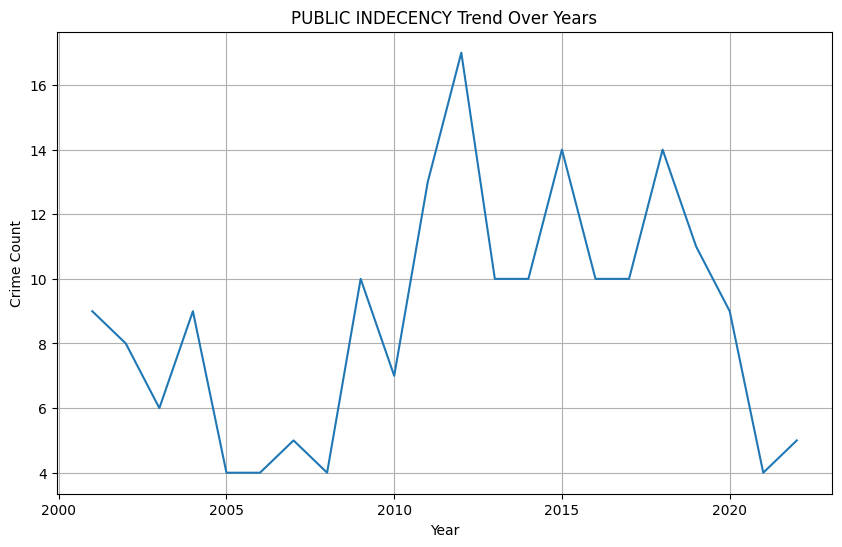

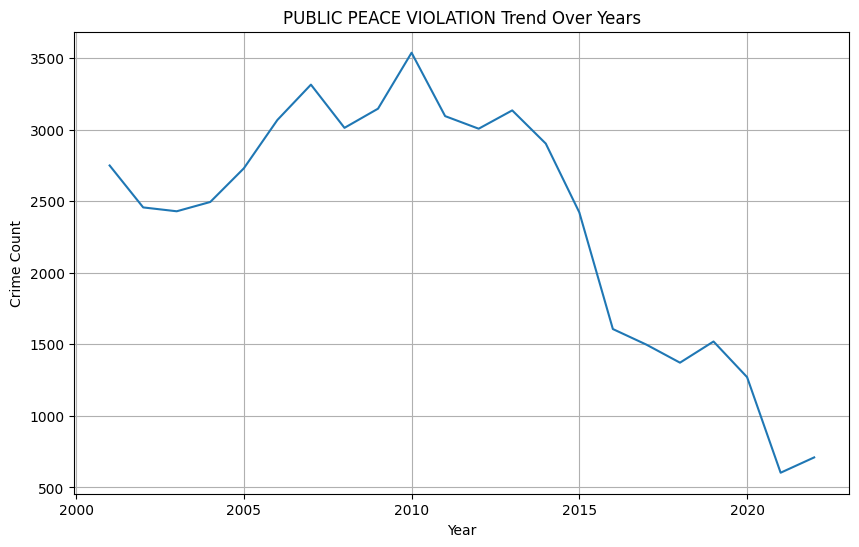

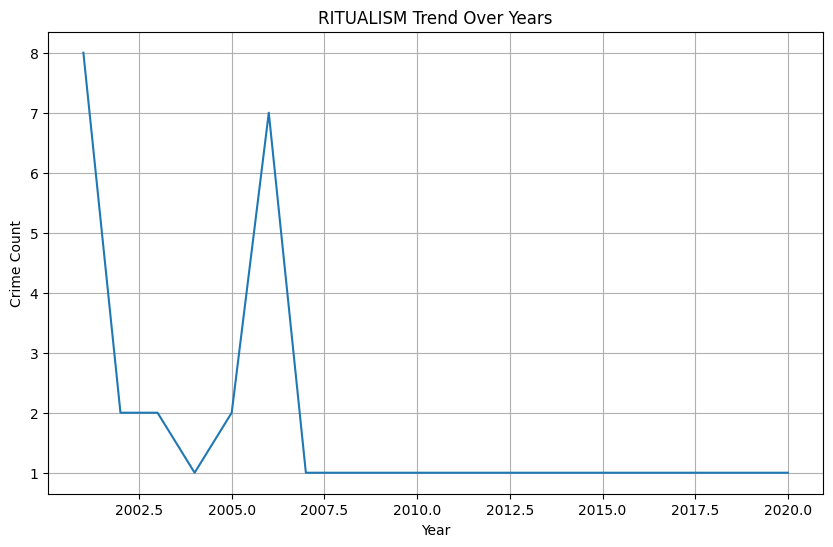

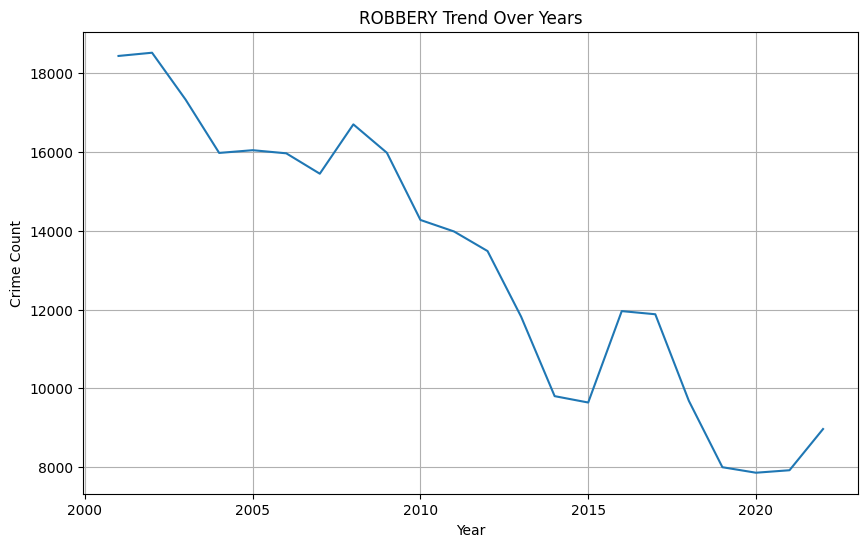

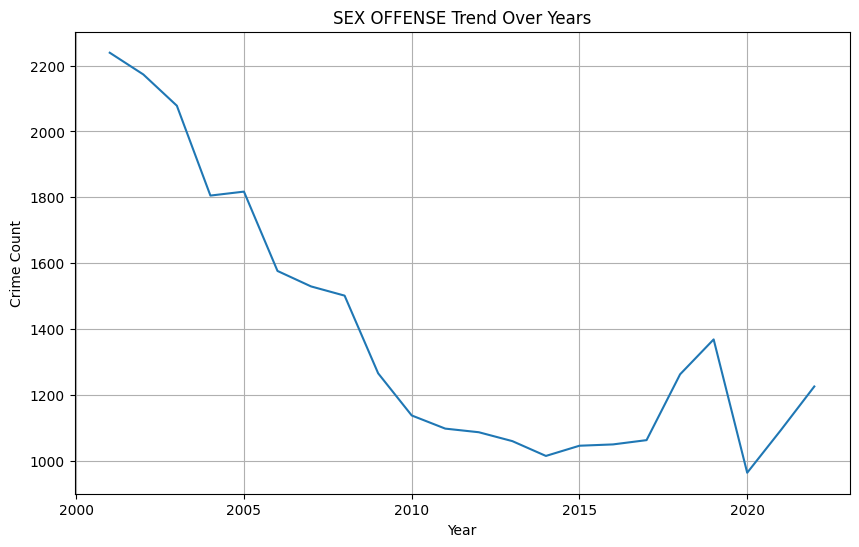

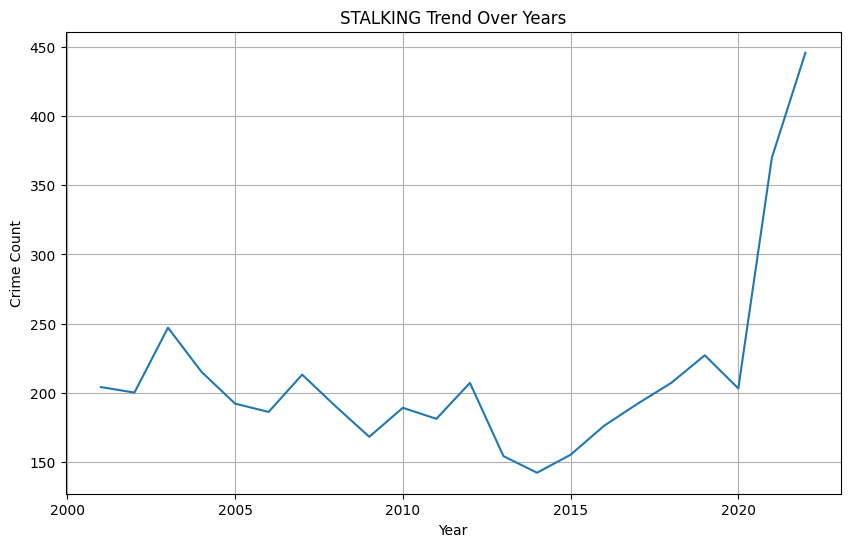

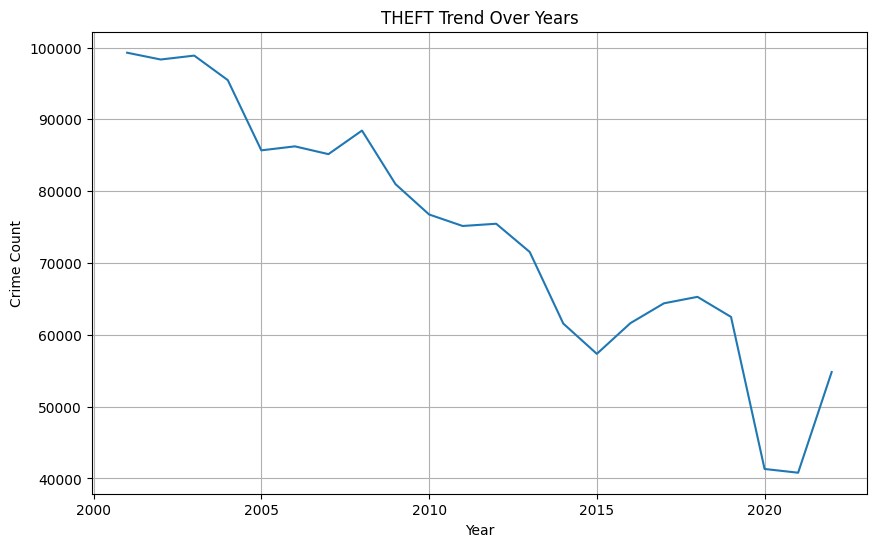

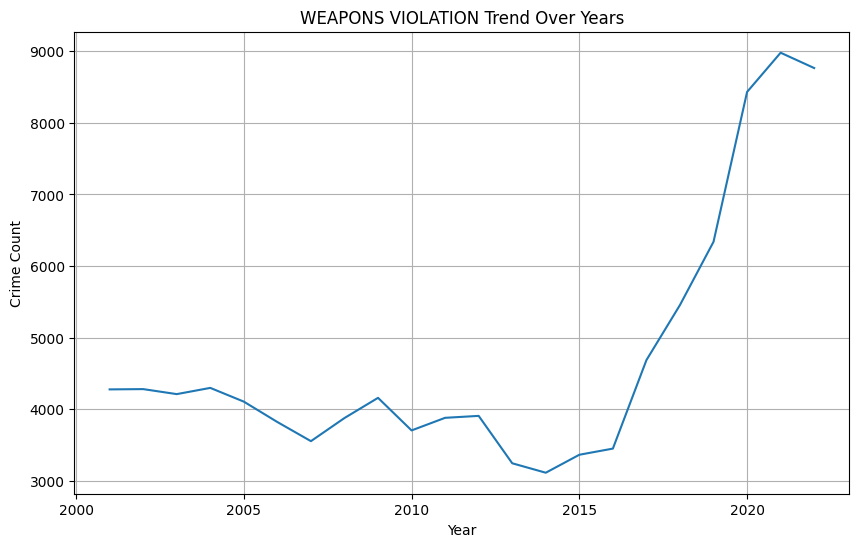

In [20]:
# Group by crime type and year and count occurrences
crime_type_yearly = df.groupby(['Primary Type', df.index.year]).size().reset_index(name='Crime Count')
crime_type_yearly = crime_type_yearly.rename(columns={'datetime': 'Year'})


unique_crime_types = crime_type_yearly['Primary Type'].unique()

for crime_type in unique_crime_types:
    crime_type_df = crime_type_yearly[crime_type_yearly['Primary Type'] == crime_type].copy()
    crime_type_df = crime_type_df.sort_values(by='Year')

    if len(crime_type_df) > 1:
        plt.figure(figsize=(10, 6))
        plt.plot(crime_type_df['Year'], crime_type_df['Crime Count'])
        plt.xlabel('Year')
        plt.ylabel('Crime Count')
        plt.title(f'{crime_type} Trend Over Years')
        plt.grid(True)
        plt.show()

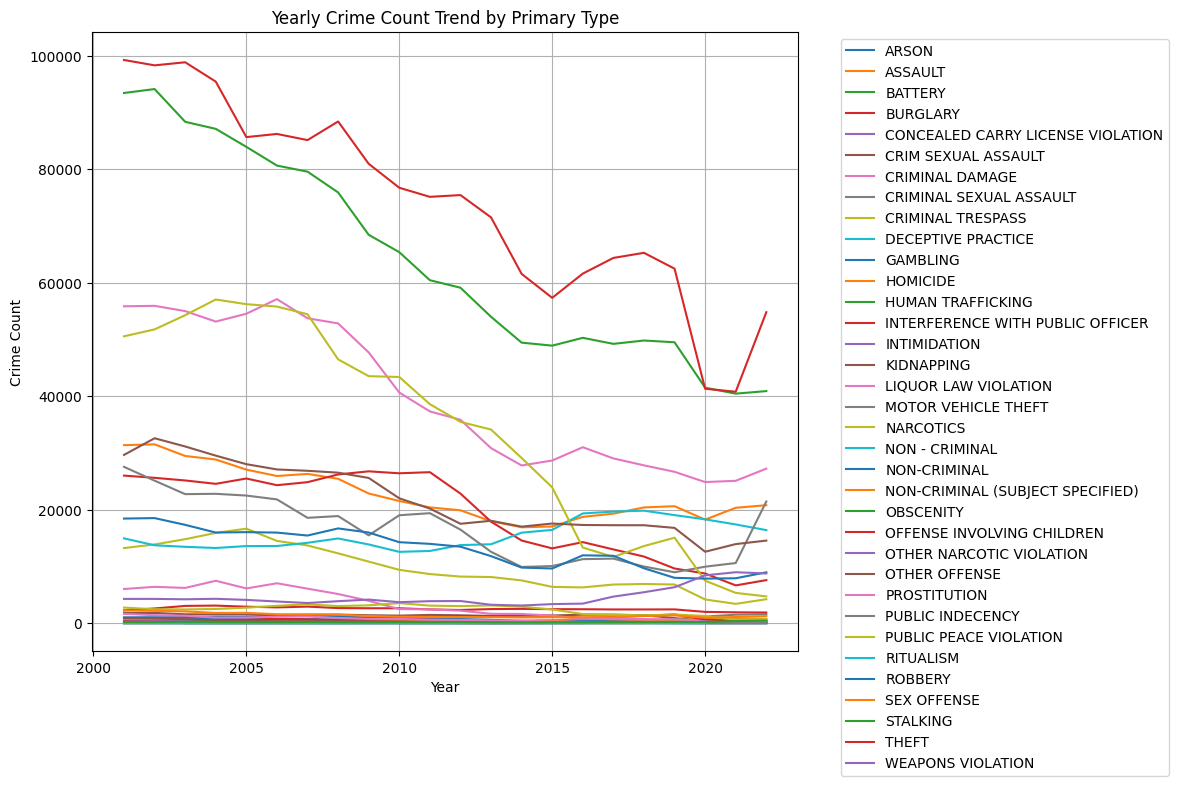

In [22]:
import matplotlib.pyplot as plt

# Group by crime type and year and count occurrences
crime_type_yearly = df.groupby(['Primary Type', df.index.year]).size().reset_index(name='Crime Count')
crime_type_yearly = crime_type_yearly.rename(columns={'datetime': 'Year'})

unique_crime_types = crime_type_yearly['Primary Type'].unique()

plt.figure(figsize=(12, 8)) # Create a single figure for all plots

for crime_type in unique_crime_types:
    crime_type_df = crime_type_yearly[crime_type_yearly['Primary Type'] == crime_type].copy()
    crime_type_df = crime_type_df.sort_values(by='Year')

    if len(crime_type_df) > 1:
        plt.plot(crime_type_df['Year'], crime_type_df['Crime Count'], label=crime_type) # Plot on the same figure

plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Yearly Crime Count Trend by Primary Type')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Add a legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Show the single figure

As We can see from the plots above  
- CRIMINAL SEXUAL ASSAULT
- DECEPTIVE PRACTICE
- HOMICIDE
- INTERFERENCE WITH PUBLIC OFFICER
- OBSCENITY
- PUBLIC INDENCENY
- STALKING
- WEAPONS VIOLATION
- NON-CRIMINAL
- HUMAN TRAFFICKING
- NON-CRIMINAL(SUBJECT SPECIFIED)

Doesnt show the decreasing patern through the years


In [26]:
Monthly_count = df.resample('ME').size().reset_index(name='Crime Count')
Monthly_count=Monthly_count.set_index('datetime')
Monthly_count.index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='datetime')

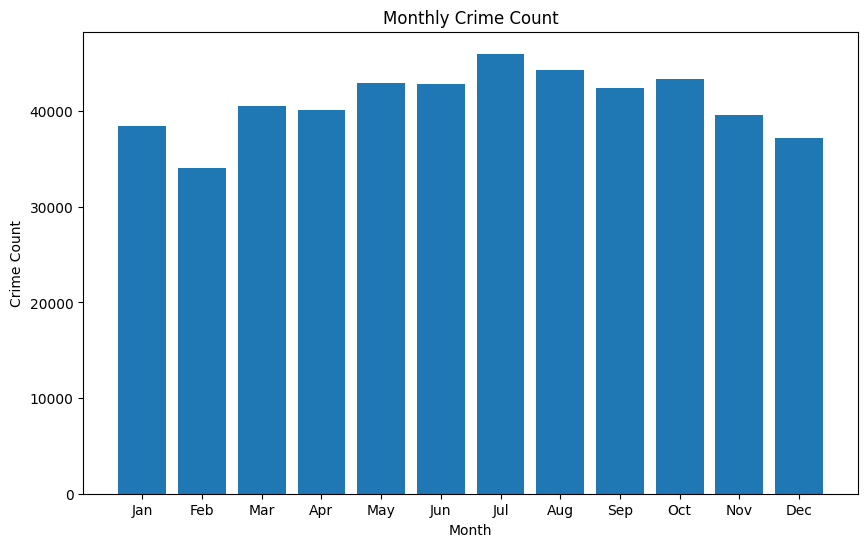

In [27]:
import matplotlib.pyplot as plt
import calendar

Monthly_count['month_name'] = Monthly_count.index.month.map(lambda x: calendar.month_abbr[x])
plt.figure(figsize=(10, 6))
plt.bar(Monthly_count['month_name'], Monthly_count['Crime Count'])
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Monthly Crime Count')
plt.show()

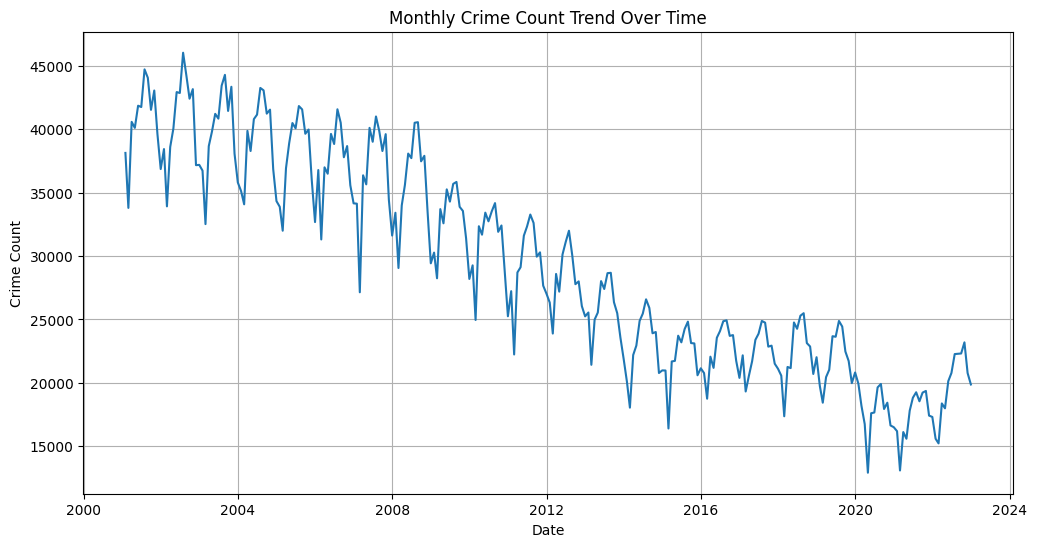

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Monthly_count.index, Monthly_count['Crime Count'])
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Monthly Crime Count Trend Over Time')
plt.grid(True)
plt.show()

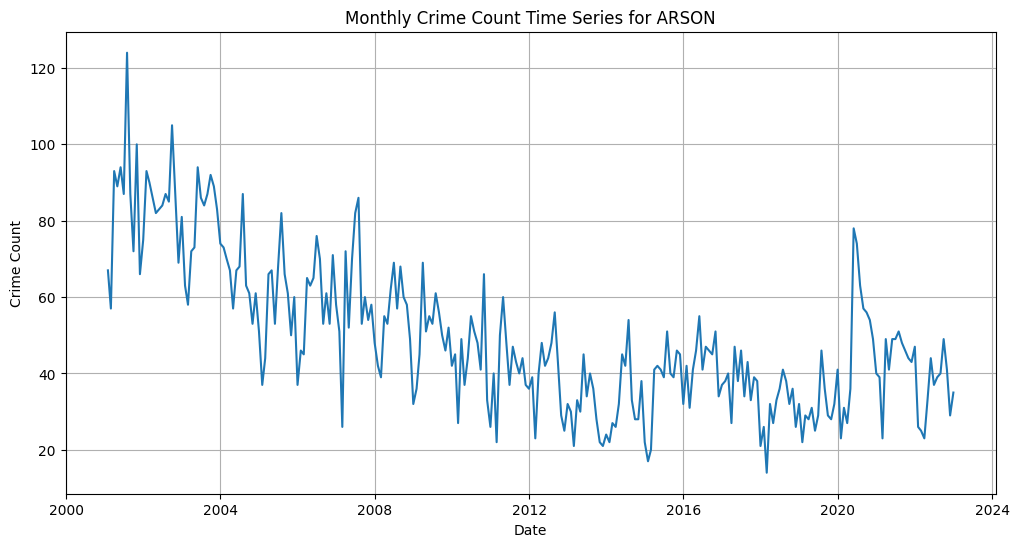

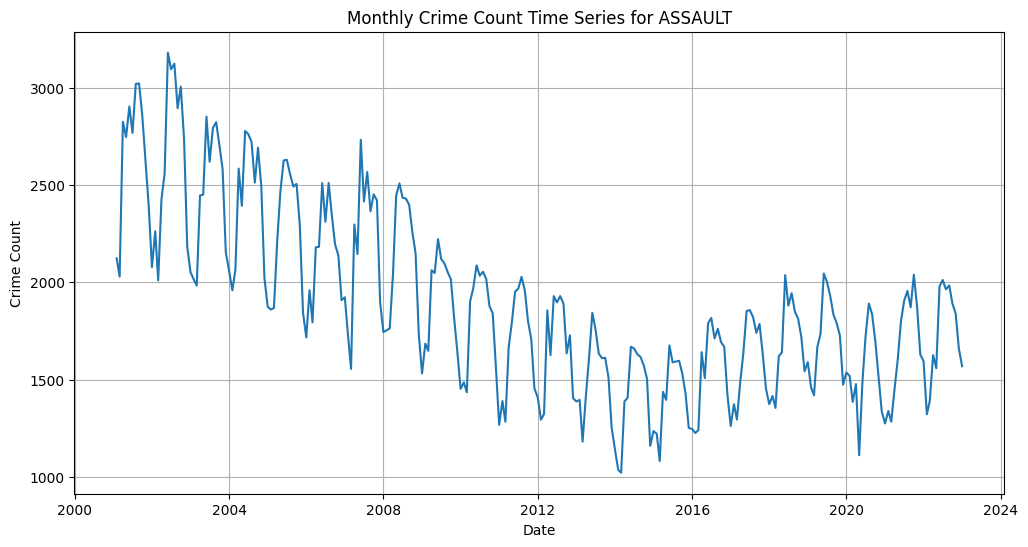

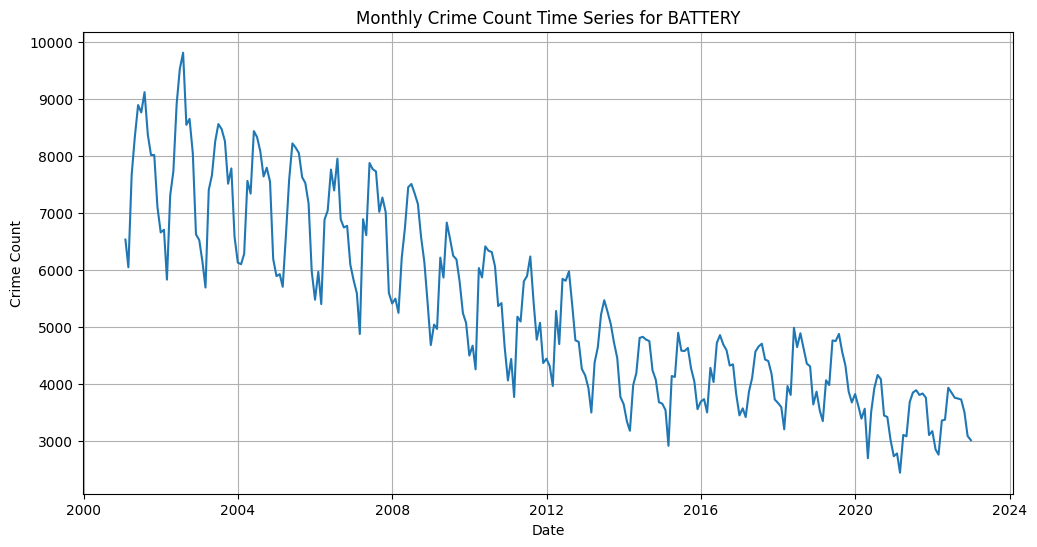

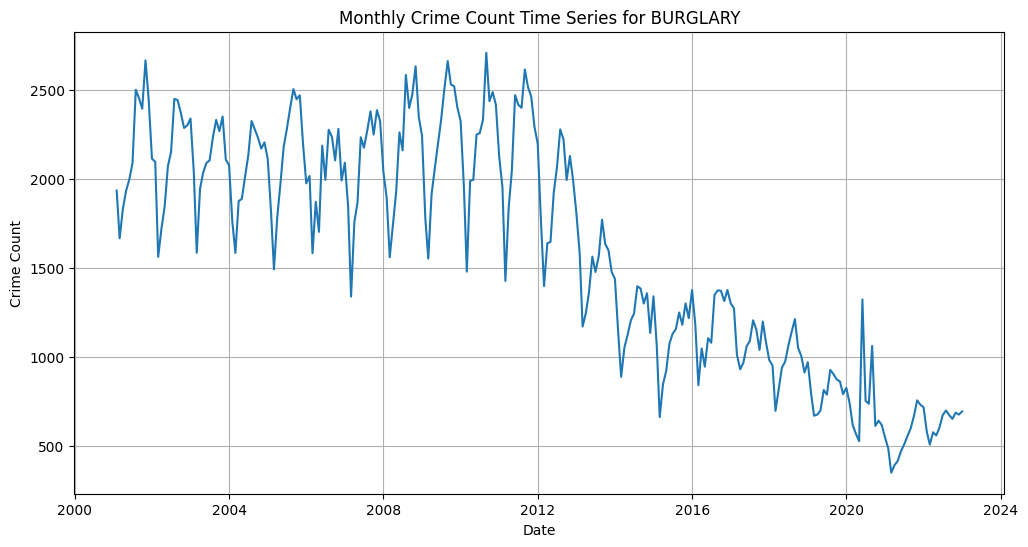

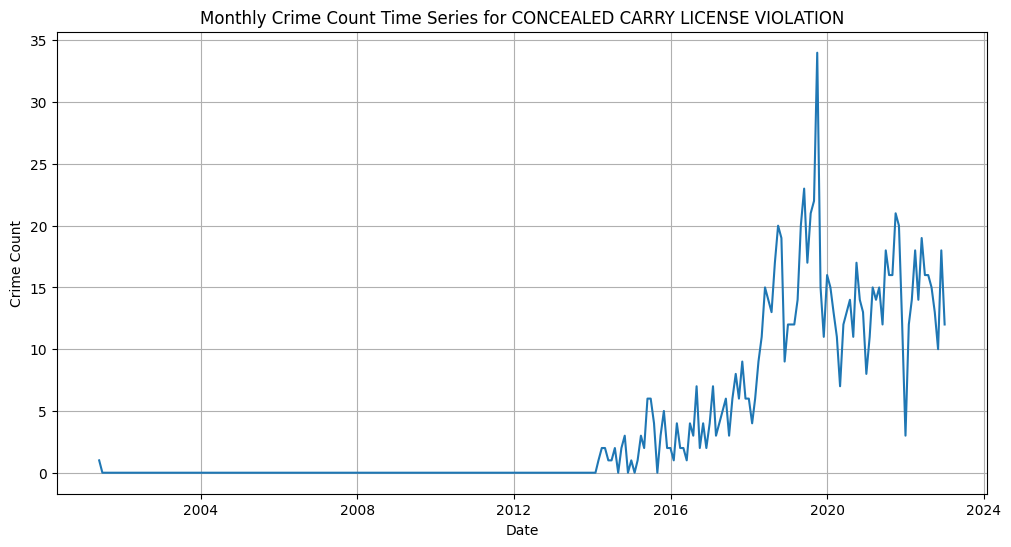

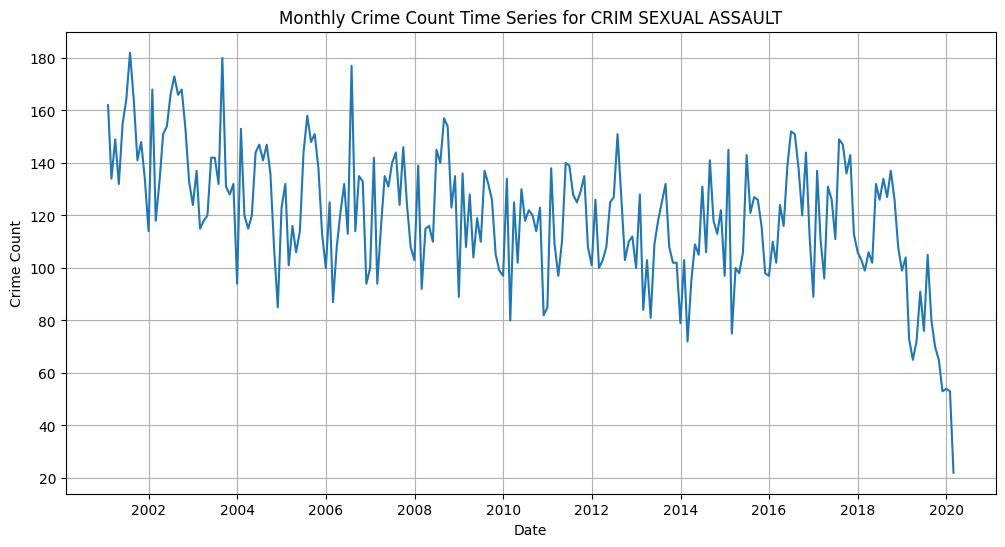

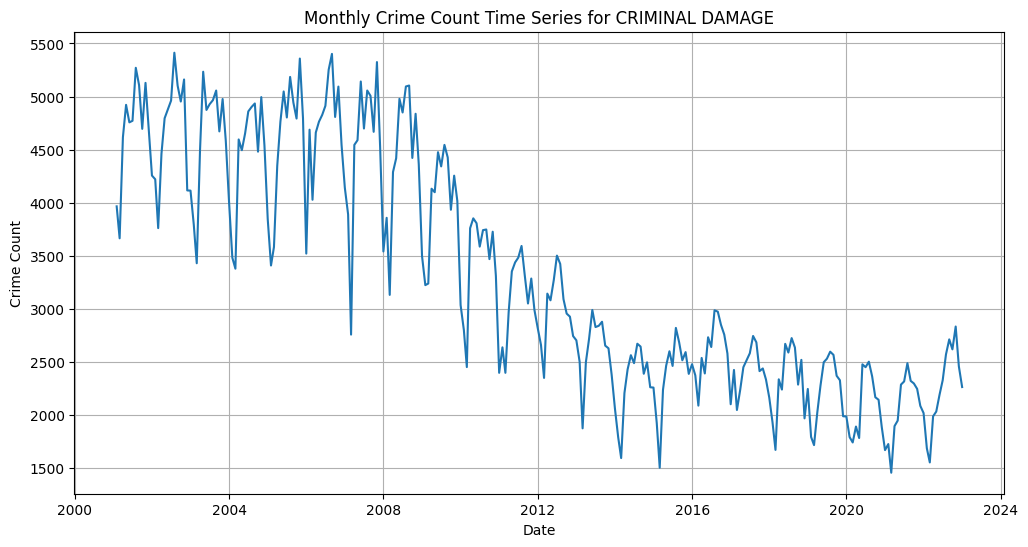

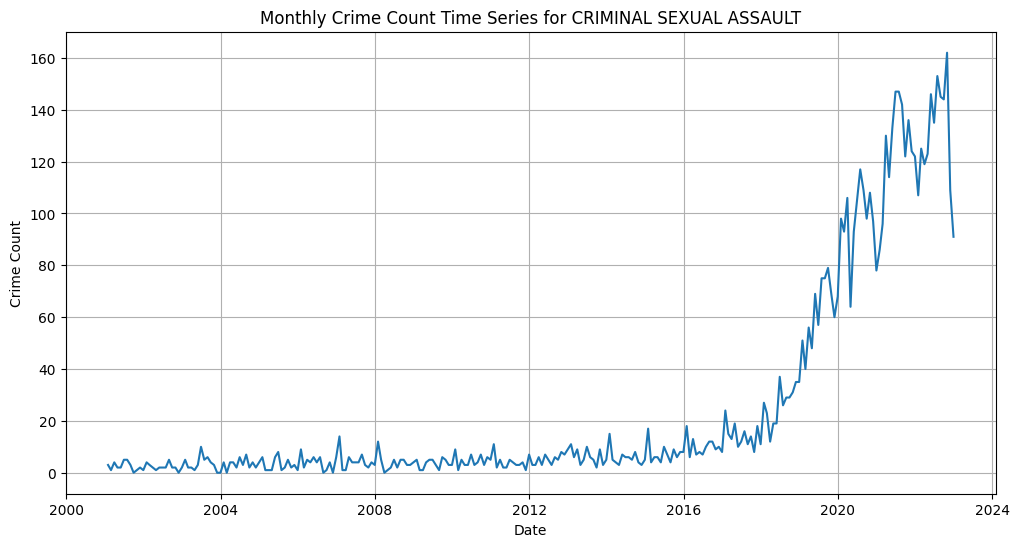

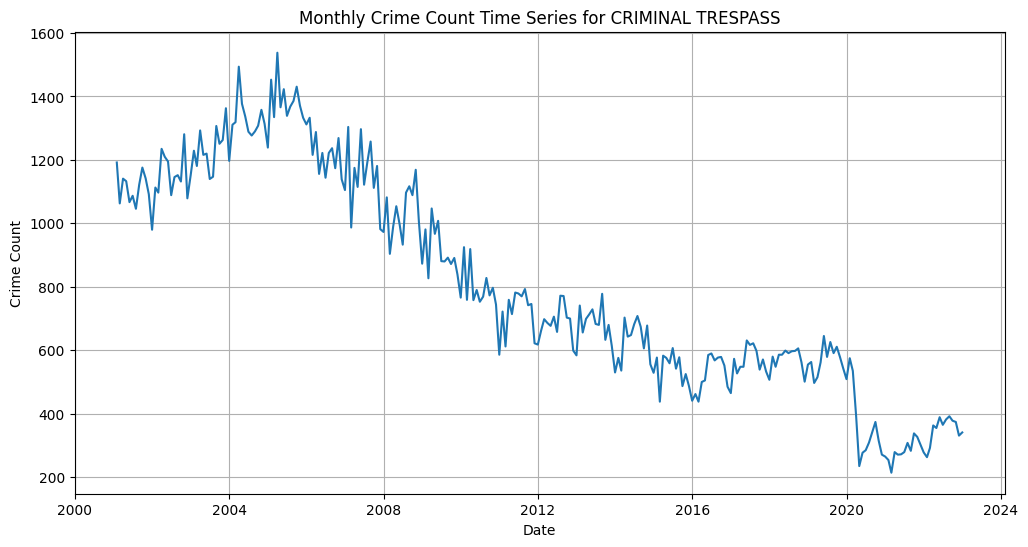

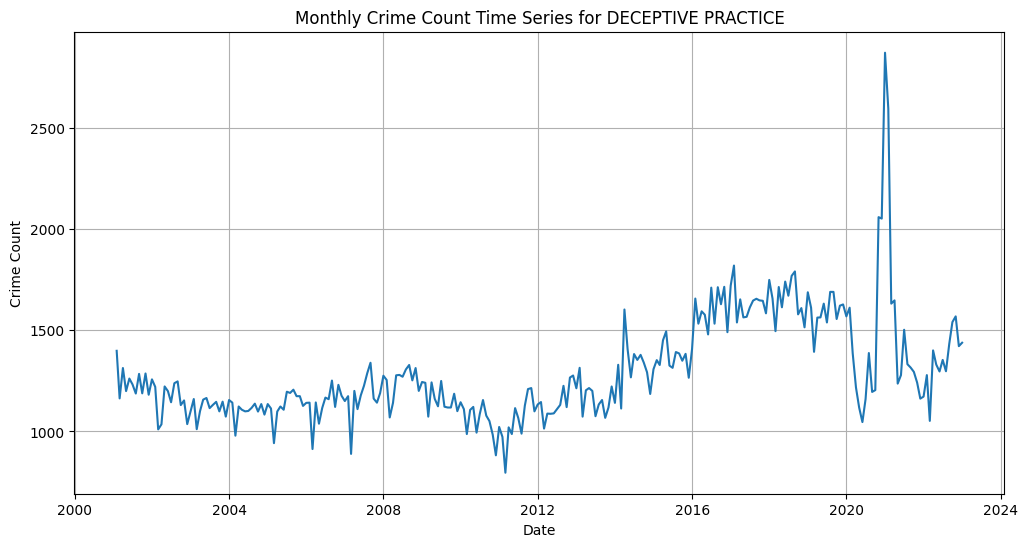

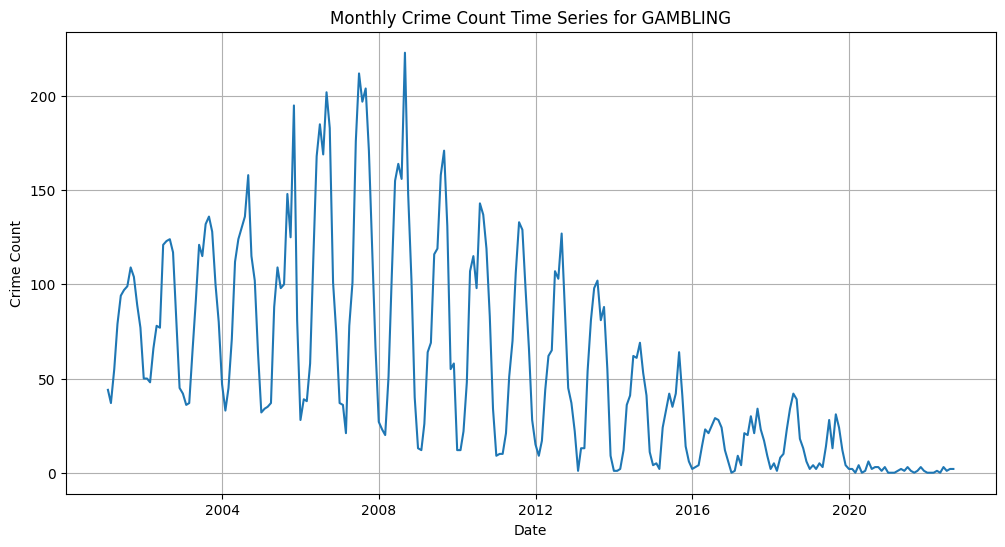

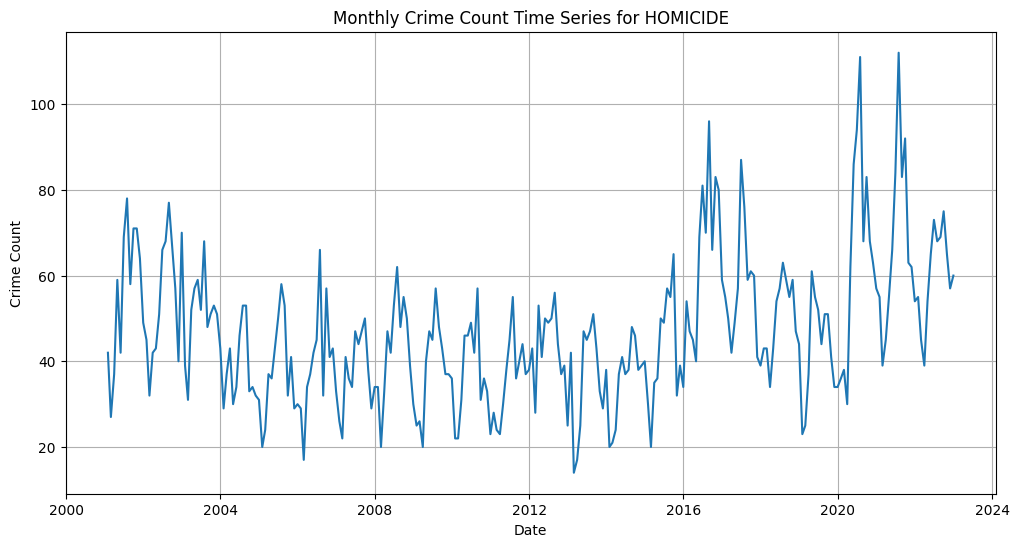

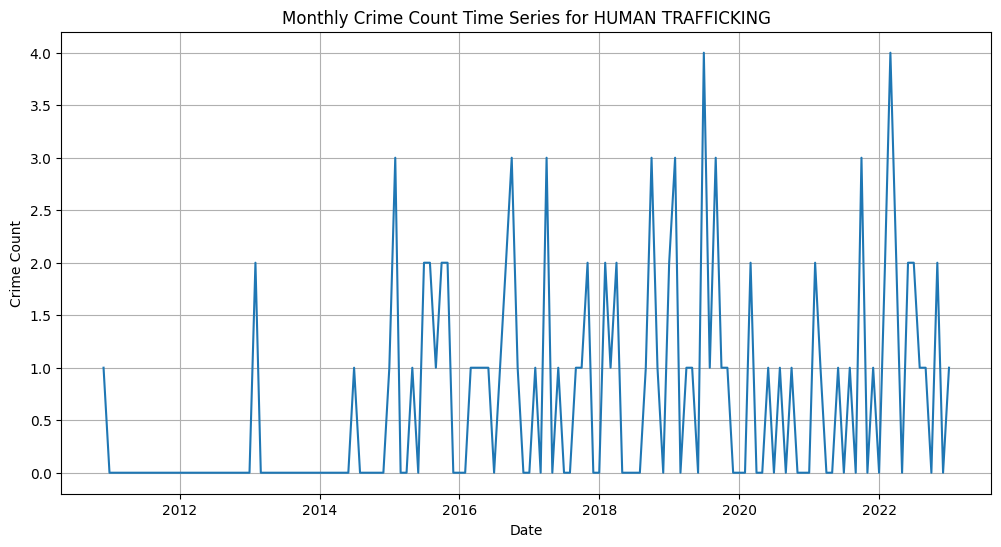

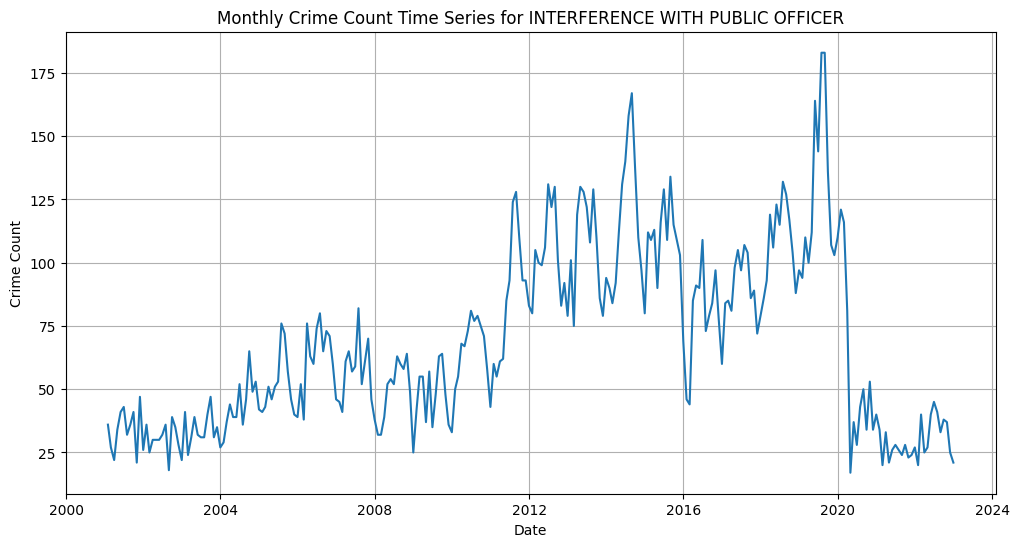

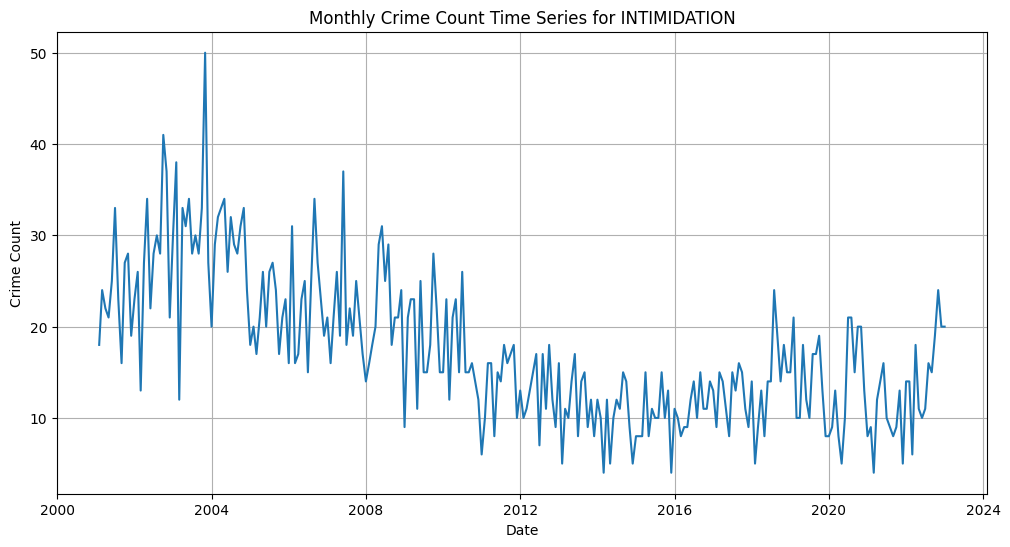

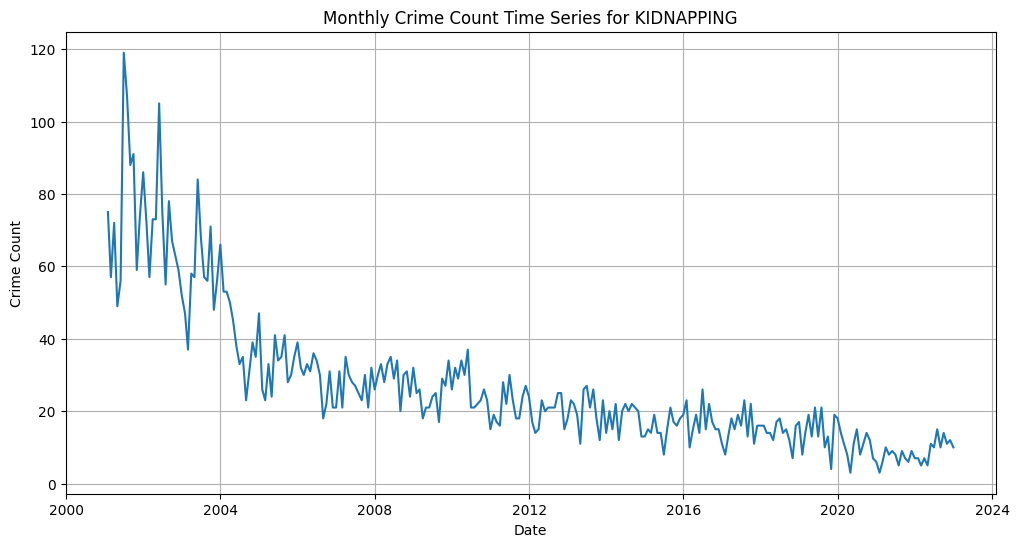

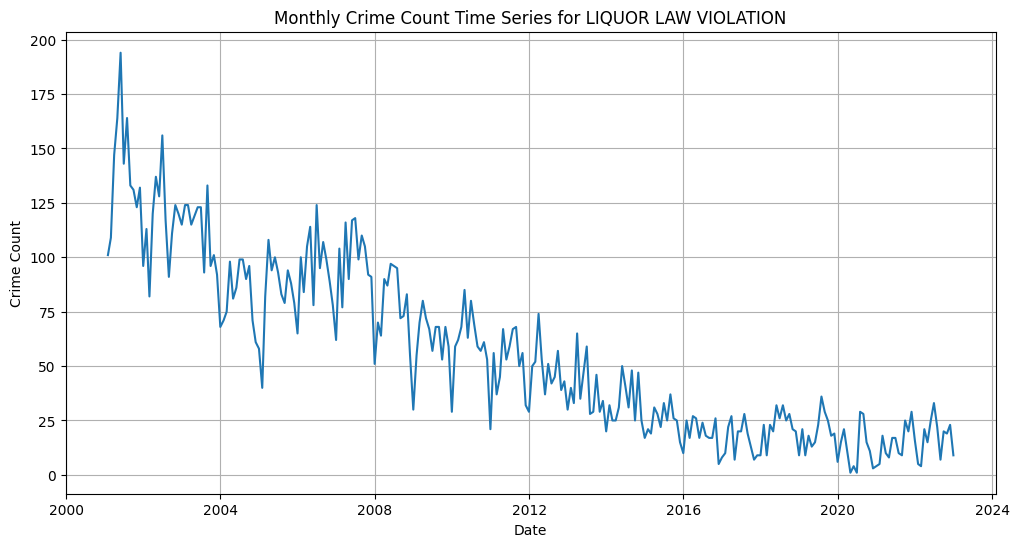

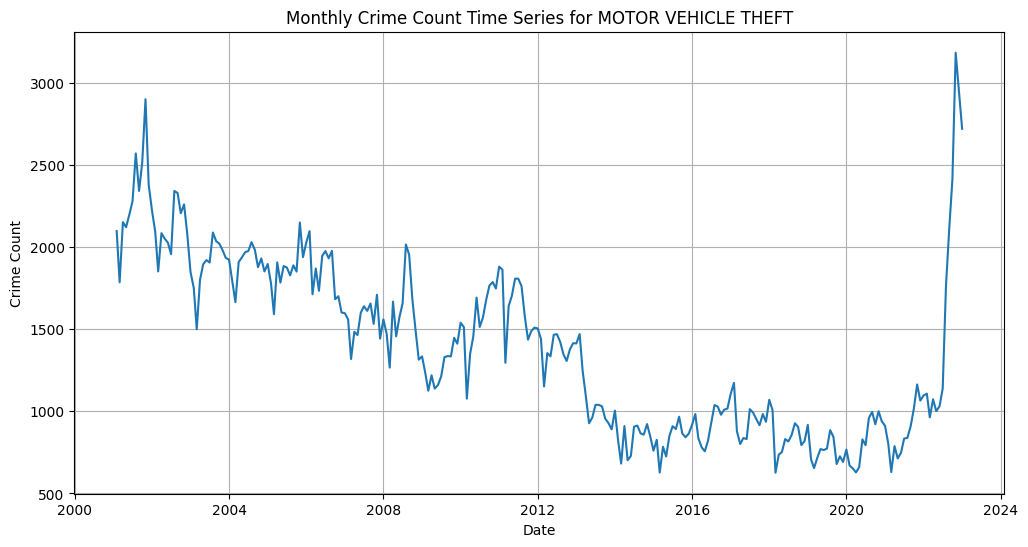

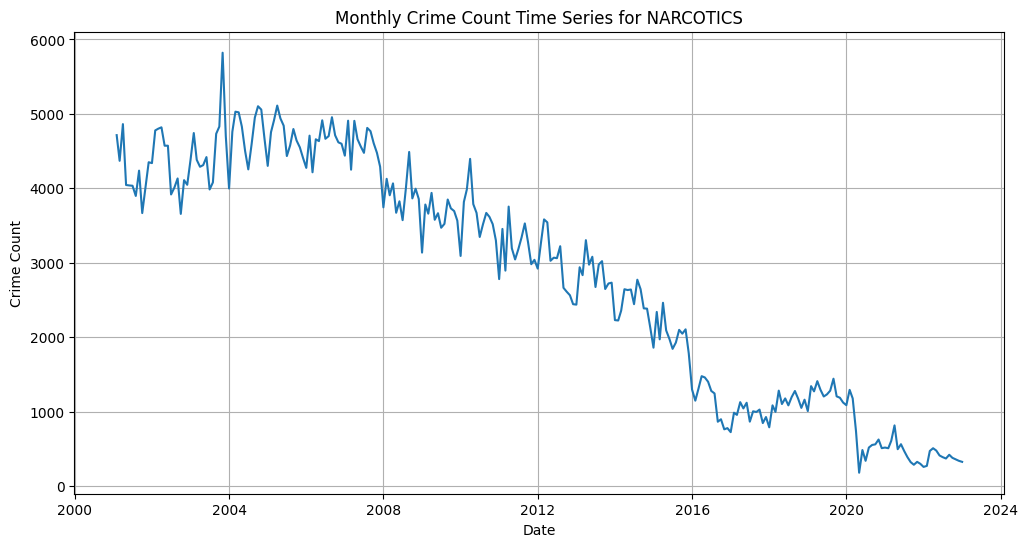

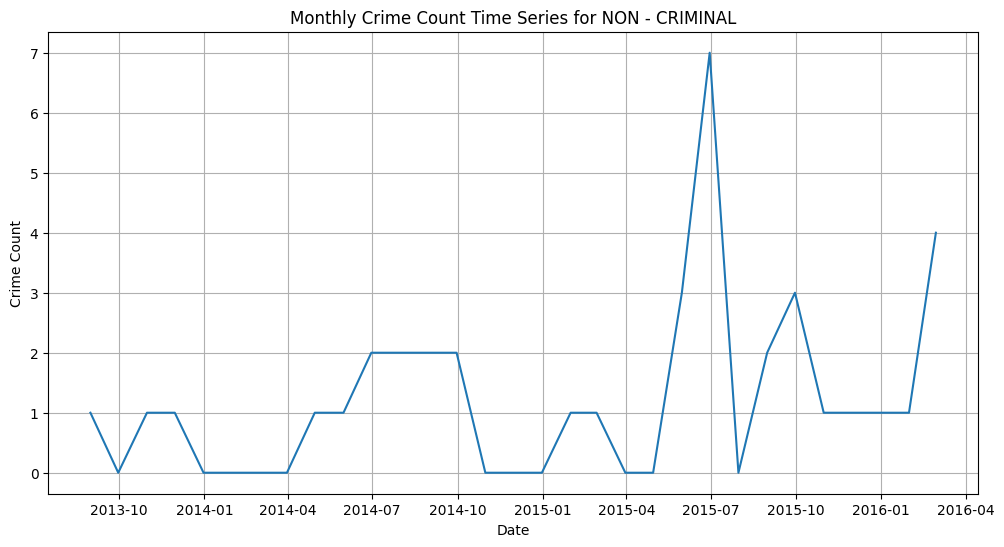

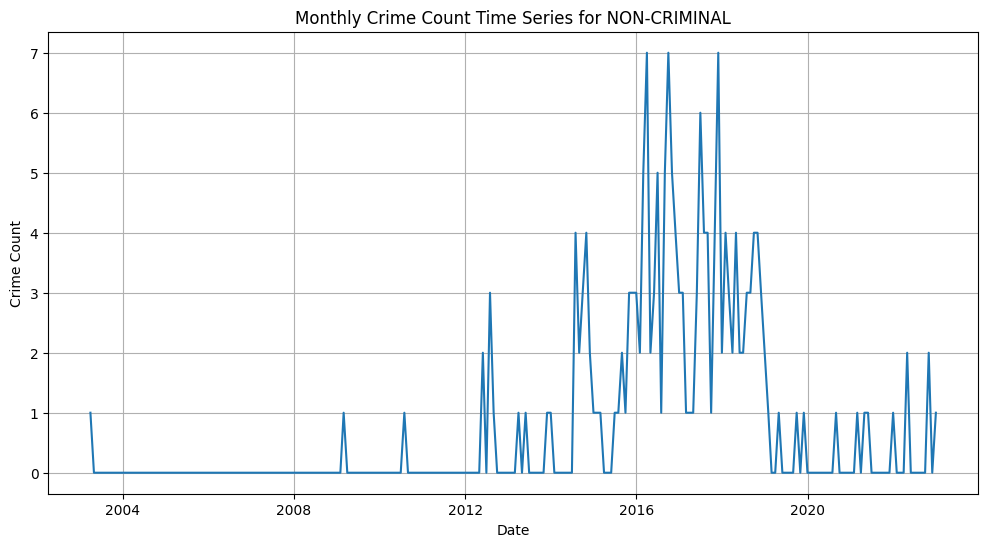

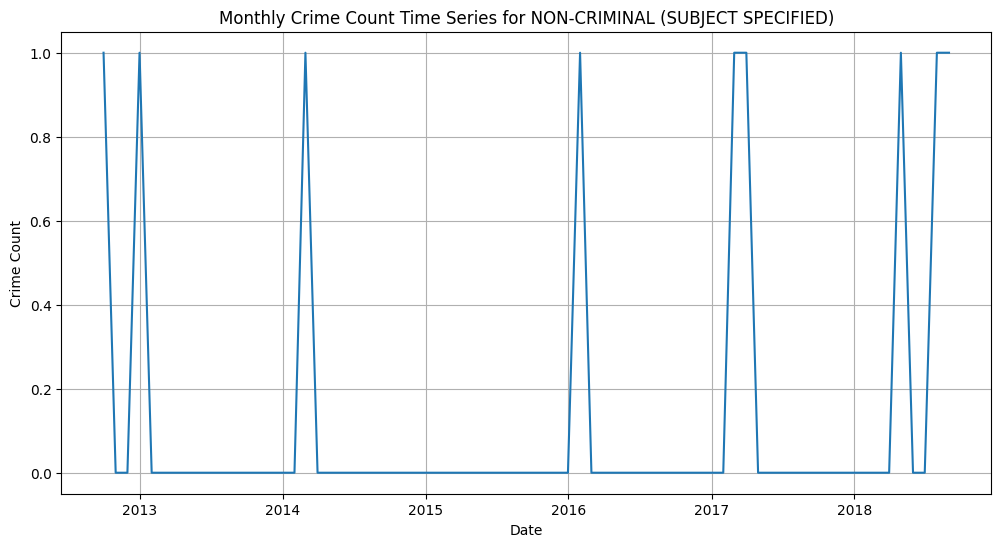

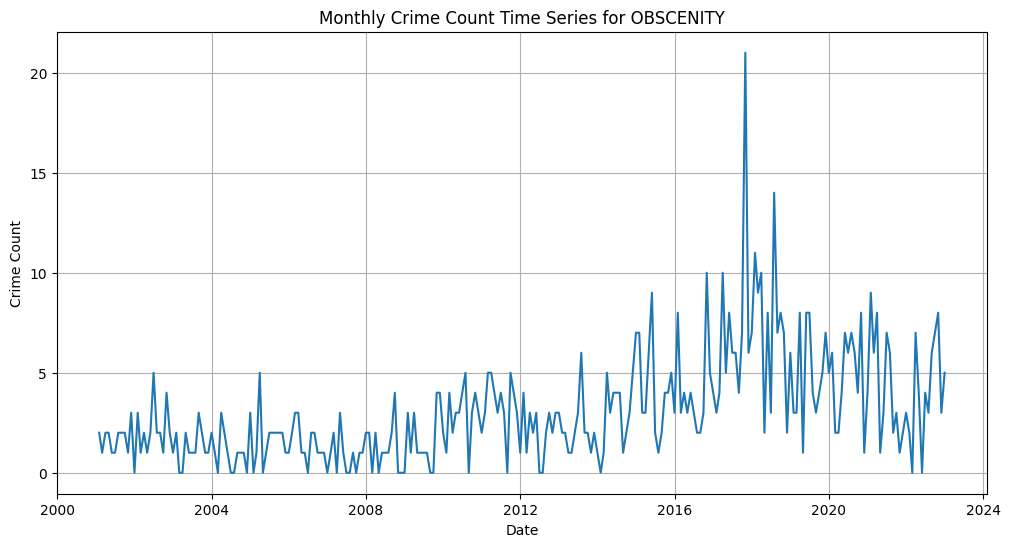

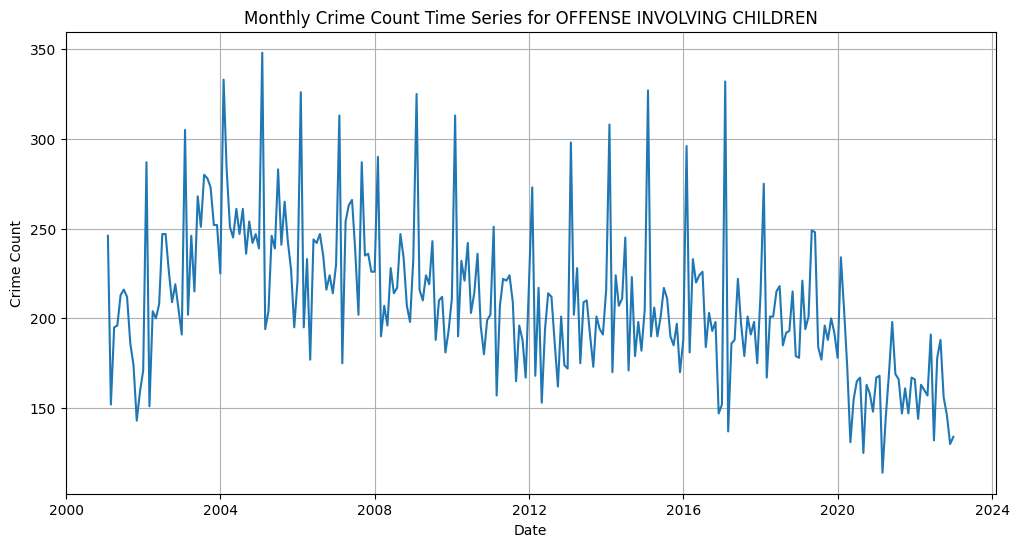

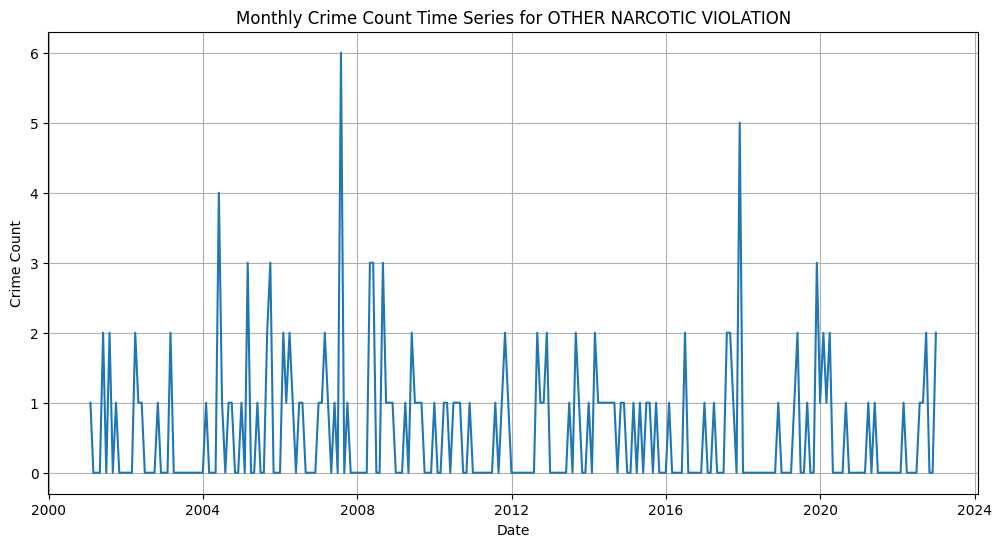

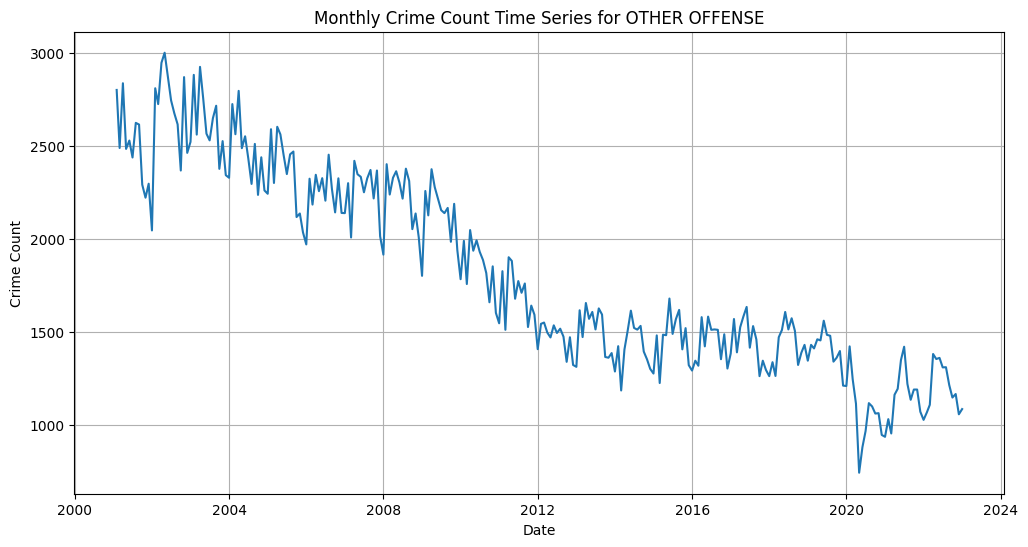

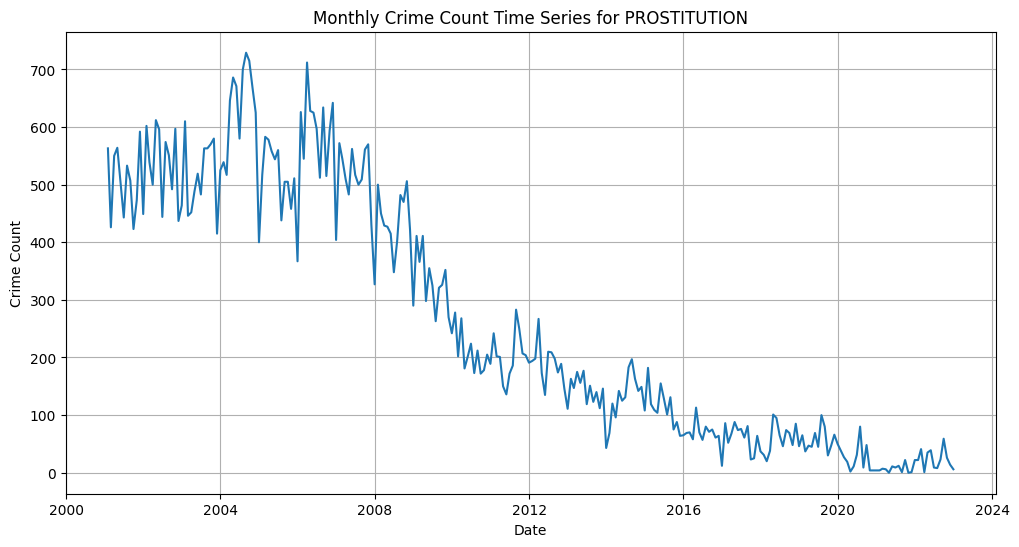

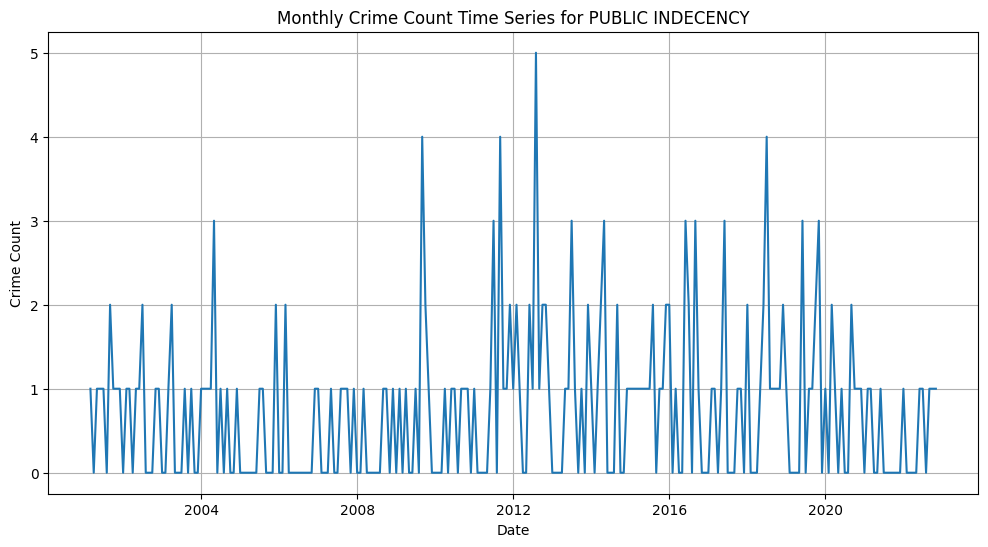

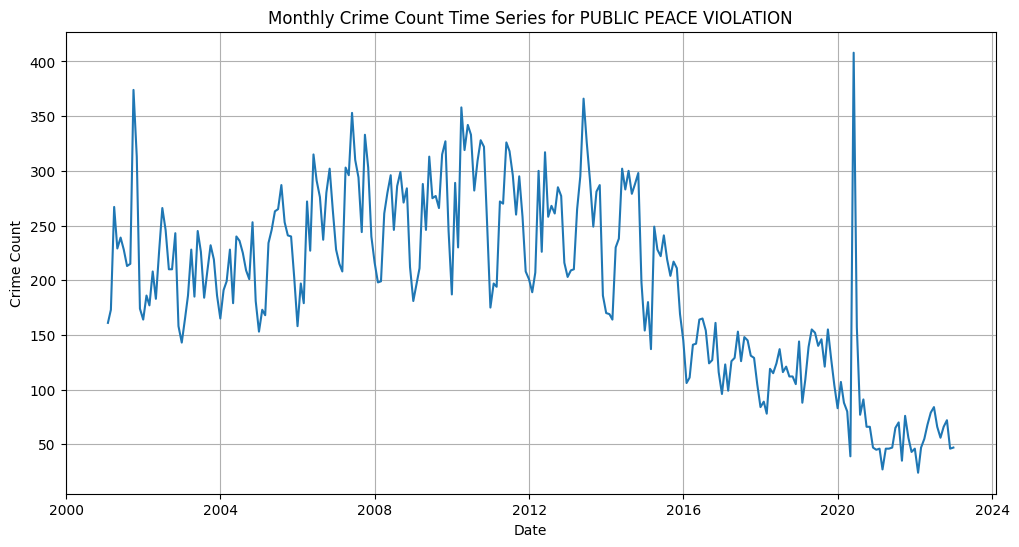

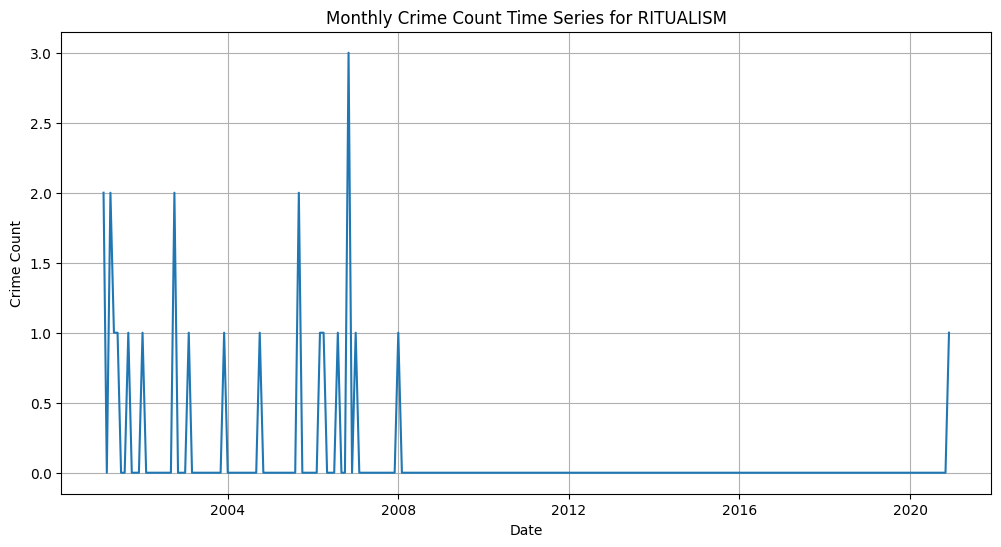

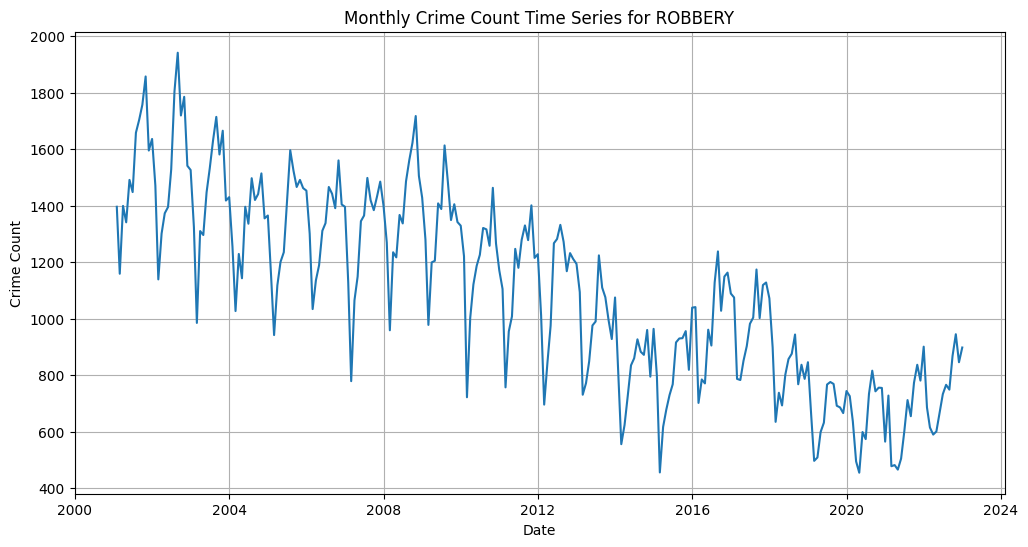

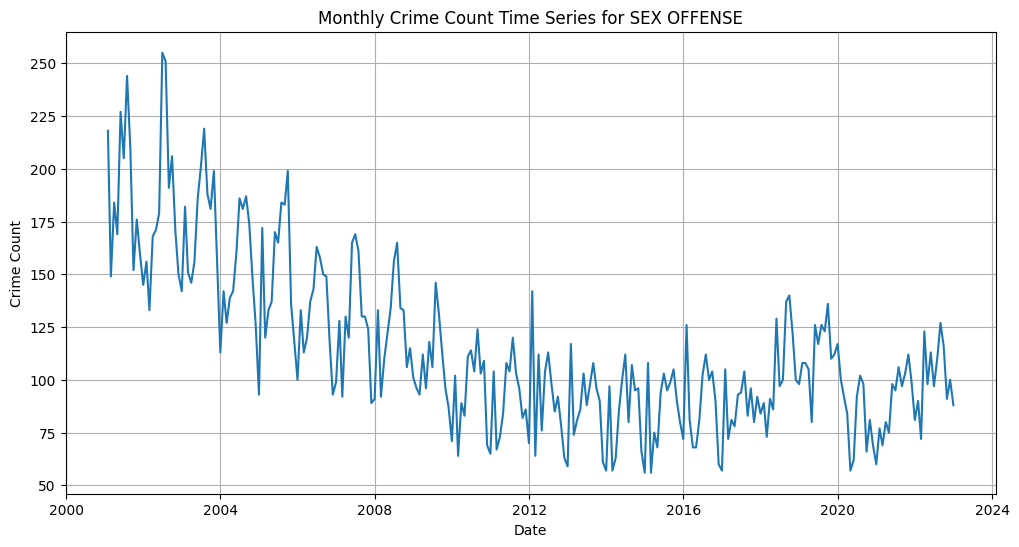

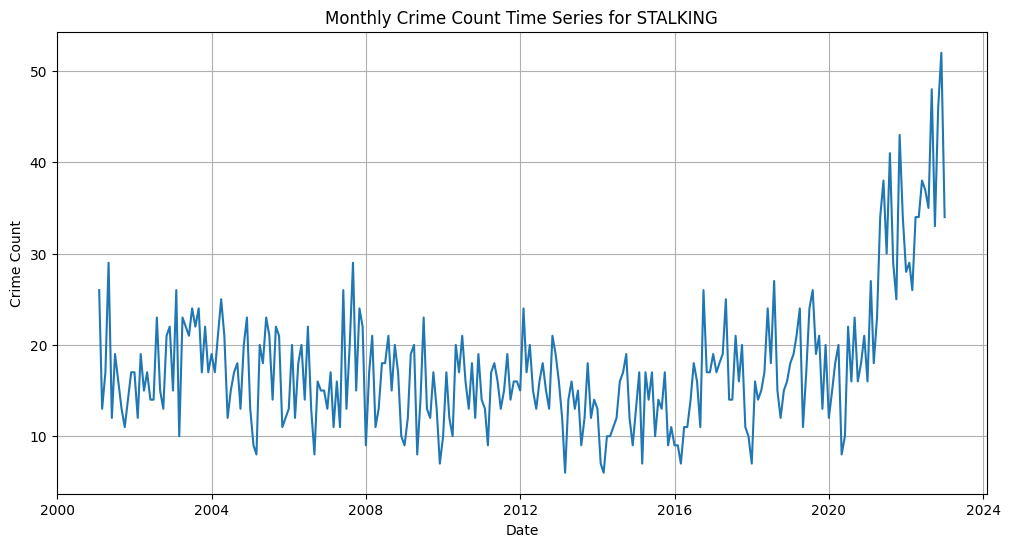

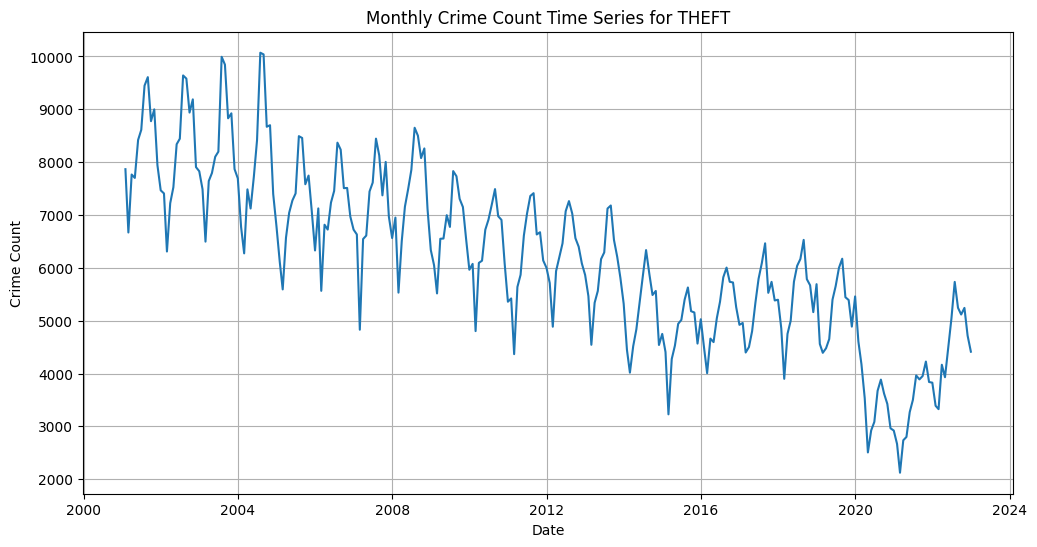

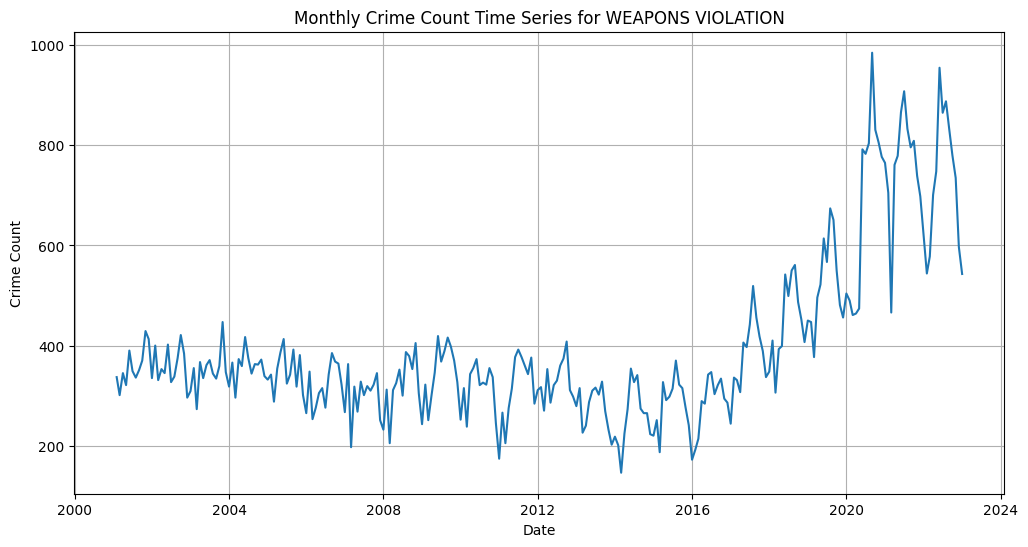

In [34]:
import matplotlib.pyplot as plt

# Group by crime type and resample to monthly frequency
monthly_crime_type_timeseries = df.groupby('Primary Type').resample('ME').size().reset_index(name='Crime Count')

unique_crime_types = monthly_crime_type_timeseries['Primary Type'].unique()

for crime_type in unique_crime_types:
    crime_type_df = monthly_crime_type_timeseries[monthly_crime_type_timeseries['Primary Type'] == crime_type].copy()

    if len(crime_type_df) > 1:
        plt.figure(figsize=(12, 6))
        plt.plot(crime_type_df['datetime'], crime_type_df['Crime Count'])
        plt.xlabel('Date')
        plt.ylabel('Crime Count')
        plt.title(f'Monthly Crime Count Time Series for {crime_type}')
        plt.grid(True)
        plt.show()